# Tailored and targeted radon risk communication

## Data cleansing

In [1]:
# libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import the data

In [509]:
# file names
control_group = "data_bfs-experiment-kg_2020-08-18_11-26.csv"
experimental_group = "data_bfs-experiment-ug_2020-08-18_11-27.csv"

In [510]:
# read the values names table
values_names = pd.read_csv("values_bfs-experiment-kg_2020-07-21_12-36.csv", encoding="latin-1")
values_names.head()

,VAR,RESPONSE,MEANING
0,SD01,1,Männlich
1,SD01,2,Weiblich
2,SD01,3,Divers
3,SD01,-1,Keine Angabe
4,SD01,-9,nicht beantwortet


In [511]:
# transpose
value_names_spread = values_names.pivot(index='RESPONSE',columns='VAR',values='MEANING')
value_names_spread.head()

VAR,CA01_01,CA01_02,CA01_03,CA01_04,CA01_05,CA01_06,CL01_01,CL01_02,CL01_03,CL01_04,CL01_05,CL01_06,CS01_01,CS01_02,CS01_03,CS01_04,CS01_05,CS01_06,FINISHED,H101,H102_01,H102_02,H102_03,H102_04,H102_05,H102_06,H102_07,H103,H104_01,H104_02,H104_03,H201_01,H201_02,H202_01,H202_02,H202_03,HI01,HI02,HI03,HI04,HI05,HI06,HM01,HM03,HM05,HM06,HM07_01,HM07_02,HM07_03,HM07_04,HM07_05,HM07_06,IO01,IO02,IO03,IO04,IO05,IO06,IS01_01,IS01_02,IS01_03,IS01_04,IS01_05,IS01_06,IS01_07,IS01_08,IS01_09,IS01_10,K001,Q_VIEWER,RW01_01,RW02_01,RW03_01,RW03_02,RW03_03,RW04_01,RW04_02,RW04_03,RW05_01,RW05_02,RW05_03,SD01,SD04,SD06,SD07,US01_01,US01_02,US01_03,US01_04,VR01,VR02,VR03,VR03_01,VR03_02,VR03_03,VR03_04,VR03_05,VR04_01,VR04_02,VR04_03,VR04_04,VR04_05,VR04_06,VR05_01,VR05_02,VR05_03,VR06
RESPONSE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-9,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,NaN,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,NaN,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,NaN,NaN,NaN,NaN,NaN,NaN,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet,nicht beantwortet
-1,kann ich nicht einschätzen,kann ich nicht einschätzen,kann ich nicht einschätzen,kann ich nicht einschätzen,kann ich nicht einschätzen,kann ich nicht einschätzen,kann ich nicht einschätzen,kann ich nicht einschätzen,kann ich nicht einschätzen,kann ich nicht einschätzen,kann ich nicht einschätzen,kann ich nicht einschätzen,kann ich nicht einschätzen,kann ich nicht einschätzen,kann ich nicht einschätzen,kann ich nicht einschätzen,kann ich nicht einschätzen,kann ich nicht einschätzen,NaN,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,NaN,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Ich weiß es nicht,Ich weiß es nicht,Ich weiß es nicht,Ich weiß es nicht,Ich weiß es nicht,Ich weiß es nicht,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,NaN,NaN,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Anga

In [512]:
# read the variable names
variables_names = pd.read_csv("variables_bfs-experiment-kg_2020-07-21_12-35.csv", encoding="latin-1")
variables_names.head()

,VAR,LABEL,TYPE,INPUT,QUESTION
0,CASE,Interview-Nummer (fortlaufend),METRIC,SYSTEM,NaN
1,SERIAL,Seriennummer (sofern verwendet),TEXT,SYSTEM,NaN
2,REF,Referenz (sofern im Link angegeben),TEXT,SYSTEM,NaN
3,QUESTNNR,"Fragebogen, der im Interview verwendet wurde",TEXT,SYSTEM,NaN
4,MODE,Interview-Modus,TEXT,SYSTEM,NaN


In [513]:
# read the data for the experimental_group (experiment)
data_eg = pd.read_csv(experimental_group, encoding="latin-1", sep = ";")

# drop the first row
data_eg = data_eg.drop(index = 0)

# read the data
data_cg = pd.read_csv(control_group, encoding="latin-1", sep = ";")

# drop the first row
data_cg = data_cg.drop(index = 0)

In [514]:
data_eg.head()

,CASE,SERIAL,REF,QUESTNNR,MODE,STARTED,M101_01,M101_02,M101_03,M101_04,M101_05,M101_06,M101_07,M101_08,M101_09,M101_10,M101_11,M101_12,M101_13,M101_14,M101_15,M101_16,SD01,SD02_01,SD03_01,SD04,SD05_01,SD06,SD07,SD08,SD09,SD10,HI01,HI02,HI03,HI04,HI05,HI06,VR01,VR02,VR03,VR03_01,VR03_02,VR03_03,VR03_04,VR03_05,VR04_01,VR04_02,VR04_03,VR04_04,VR04_05,VR04_06,VR05_01,VR05_02,VR05_03,VR06,HM01,HM02_01,HM03,HM04_01,HM05,HM06,HM07_01,HM07_02,HM07_03,HM07_04,HM07_05,HM07_06,M201_01,M201_02,M201_03,M201_04,M201_05,M201_06,M201_07,M201_08,M201_09,M201_10,M201_11,M201_12,M201_13,M201_14,M201_15,M201_16,M401_01,M401_02,M401_03,M401_04,M401_05,M401_06,M401_07,M401_08,M401_09,M401_10,M401_11,M401_12,M401_13,M401_14,M401_15,M401_16,M301_01,M301_02,M301_03,M301_04,M301_05,M301_06,M301_07,M301_08,M301_09,M301_10,M301_11,M301_12,M301_13,M301_14,M301_15,M301_16,RG01,RG02,IS01_01,IS01_02,IS01_03,IS01_04,IS01_05,IS01_06,IS01_07,IS01_08,IS01_09,IS01_10,IS02_01,IS03_01,IO01,IO02,IO03,IO04,IO05,IO06,RW01_01,RW02_01,RW03_01,RW03_02,RW03_03,RW04_01,RW04_02,RW04_03,RW05_01,RW05_02,RW05_03,H101,H102_01,H102_02,H102_03,H102_04,H102_05,H102_06,H102_07,H103,H104_01,H104_02,H104_03,H105_01,H106_01,H201_01,H201_02,H202_01,H202_02,H202_03,CL01_01,CL01_02,CL01_03,CL01_04,CL01_05,CL01_06,CA01_01,CA01_02,CA01_03,CA01_04,CA01_05,CA01_06,CS01_01,CS01_02,CS01_03,CS01_04,CS01_05,CS01_06,US01_01,US01_02,US01_03,US01_04,GK01_01,GK02_01,GK03_01,GK04_01,GK05_01,GK06_01,GK07_01,GK08_01,GK09_01,GK10_01,GK11_01,GK12_01,GK13_01,GK14_01,GK15_01,GK16_01,TIME001,TIME002,TIME004,TIME006,TIME008,TIME009,TIME010,TIME011,TIME012,TIME013,TIME014,TIME015,TIME016,TIME017,TIME018,TIME019,TIME020,TIME021,TIME022,TIME023,TIME024,TIME025,TIME026,TIME027,TIME028,TIME029,TIME030,TIME031,TIME032,TIME033,TIME034,TIME_SUM,MAILSENT,LASTDATA,FINISHED,Q_VIEWER,LASTPAGE,MAXPAGE,MISSING,MISSREL,TIME_RSI,DEG_TIME
1,379,NaN,NaN,base,interview,2020-07-29 17:25:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1978,09224,4,4,2,1,2,NaN,6,2,1,1,3,3,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,4,5,4,4,4,5,5,5,5,5,Übersicht,viel,2,1,2,2,2,2,NaN,3,3,2,3,3,4,4,2,3,3,1,3,4,3,3,3,4,4,-1,NaN,NaN,NaN,keine weitere,NaN,4,-1,3,3,4,4,4,4,4,4,4,4,3,4,4,4,4,4,3,3,4,4,4,4,3,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,4,23,21,6,NaN,NaN,3,NaN,37,NaN,2,18,NaN,NaN,NaN,NaN,NaN,NaN,18,35,17,9,15,6,NaN,10,12,5,245,NaN,2020-07-29 17:30:04,1,0,34,34,14,0,2.18,105
2,380,NaN,NaN,base,interview,2020-07-29 17:36:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1960,08228,5,2,1,1,2,NaN,2,1,1,2,1,3,2,2,6,1,1,1,1,1,2,3,2,3,2,3,1,2,2,2,2,1,NaN,1,NaN,1,1,3,2,2,2,3,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,4,2,2,2,5,3,3,3,2,NaN,NaN,2,2,1,1,2,2,2,2,2,2,1,3,3,2,2,3,2,1,1,1,4,4,4,1,3,-1,NaN,NaN,NaN,NaN,NaN,3,3,3,3,2,3,2,2,3,3,3,3,3,2,3,2,3,3,3,2,2,2,3,3,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4,NaN,4,46,24,6,6,51,12,39,NaN,49,NaN,NaN,NaN,NaN,NaN,NaN,3,49,34,51,34,5,28,9,NaN,10,20,5,491,NaN,2020-07-29 17:45:06,1,0,34,34,16,2,1.68,50
3,381,NaN,NaN,base,interview,2020-07-29 18:34:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1958,09113,4,2,1,1,2,NaN,6,1,1,2,3,3,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4,4,3,4,4,3,3,4,4,4,man sollte messen,nichts,2,2,1,1,2,2,NaN,3,2,2,2,3,3,3,3,3,3,1,3,-1,3,2,3,-1,-1,-1,NaN,NaN,NaN,NaN,N

In [515]:
data_cg.head()

,CASE,SERIAL,REF,QUESTNNR,MODE,STARTED,M501_01,M501_02,M501_03,M501_04,M501_05,M501_06,M502_01,M502_02,M502_03,SD01,SD02_01,SD03_01,SD04,SD05_01,SD06,SD07,SD08,SD09,SD10,HI01,HI02,HI03,HI04,HI05,HI06,VR01,VR02,VR03,VR03_01,VR03_02,VR03_03,VR03_04,VR03_05,VR04_01,VR04_02,VR04_03,VR04_04,VR04_05,VR04_06,VR05_01,VR05_02,VR05_03,VR06,HM01,HM02_01,HM03,HM04_01,HM05,HM06,HM07_01,HM07_02,HM07_03,HM07_04,HM07_05,HM07_06,K001,IS01_01,IS01_02,IS01_03,IS01_04,IS01_05,IS01_06,IS01_07,IS01_08,IS01_09,IS01_10,IS02_01,IS03_01,IO01,IO02,IO03,IO04,IO05,IO06,RW01_01,RW02_01,RW03_01,RW03_02,RW03_03,RW04_01,RW04_02,RW04_03,RW05_01,RW05_02,RW05_03,H101,H102_01,H102_02,H102_03,H102_04,H102_05,H102_06,H102_07,H103,H104_01,H104_02,H104_03,H105_01,H106_01,H201_01,H201_02,H202_01,H202_02,H202_03,CL01_01,CL01_02,CL01_03,CL01_04,CL01_05,CL01_06,CA01_01,CA01_02,CA01_03,CA01_04,CA01_05,CA01_06,CS01_01,CS01_02,CS01_03,CS01_04,CS01_05,CS01_06,US01_01,US01_02,US01_03,US01_04,GK01_01,GK02_01,GK03_01,GK04_01,GK05_01,GK07_01,GK08_01,GK09_01,GK10_01,GK11_01,GK12_01,GK14_01,GK15_01,GK16_01,TIME001,TIME002,TIME004,TIME006,TIME008,TIME009,TIME010,TIME011,TIME012,TIME013,TIME014,TIME015,TIME016,TIME017,TIME018,TIME019,TIME020,TIME021,TIME022,TIME023,TIME024,TIME025,TIME026,TIME027,TIME_SUM,MAILSENT,LASTDATA,FINISHED,Q_VIEWER,LASTPAGE,MAXPAGE,MISSING,MISSREL,TIME_RSI,DEG_TIME
1,165,NaN,NaN,base,interview,2020-07-29 17:59:21,2,2,1,1,1,1,1,1,1,1,1968,09116,4,1,1,1,2,NaN,6,1,1,2,1,3,4,2,6,1,1,1,1,1,2,-1,3,3,-1,-1,-1,1,1,1,2,1,NaN,1,NaN,1,1,1,1,-1,1,1,1,1,4,4,3,3,3,2,3,3,3,3,sehr übersichtlich,habe das gefühl das dies ein weiterer versuch ...,-1,2,1,1,2,1,1,2,2,2,2,3,4,3,2,2,2,1,-1,1,-1,-1,4,1,4,-1,NaN,NaN,NaN,NaN,NaN,4,2,3,3,-1,1,4,-1,4,1,3,1,4,3,3,1,-1,4,-1,-1,-1,-1,-1,1,-1,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN,5,27,22,12,13,43,5,36,96,6,59,76,74,44,4,34,9,NaN,33,76,20,701,NaN,2020-07-29 18:11:02,1,0,27,27,15,1,1.2,14
2,166,NaN,NaN,base,interview,2020-07-29 18:28:40,2,2,2,1,2,2,1,1,1,2,1961,01108,5,2,1,2,2,NaN,7,2,1,1,3,3,3,2,6,1,1,1,2,1,1,4,1,3,4,4,1,3,3,3,2,1,NaN,1,NaN,1,1,4,1,4,-1,3,4,2,5,5,5,5,5,5,5,5,5,5,Sachlich und informativ,nichts,2,2,1,2,2,2,4,4,2,2,1,4,4,4,3,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,4,4,4,4,4,1,4,2,4,1,4,1,4,1,4,1,4,3,4,2,4,1,3,2,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,3,NaN,6,22,30,6,7,29,5,57,66,6,245,24,61,43,6,NaN,8,NaN,15,59,15,722,NaN,2020-07-29 18:40:42,1,0,27,27,14,1,1.25,14
3,167,NaN,NaN,base,interview,2020-07-29 19:06:38,1,1,1,1,1,2,1,1,1,1,1965,83278,4,1,1,1,1,14,NaN,1,1,2,2,2,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,5,5,4,4,5,2,3,4,4,4,übersichtlich,viel Text,2,2,1,1,2,2,NaN,2,1,2,1,3,3,3,-1,2,2,1,-1,2,-1,3,3,-1,2,2,NaN,NaN,NaN,NaN,NaN,3,3,3,3,3,2,3,2,3,1,-1,2,3,-1,-1,3,3,2,3,-1,-1,3,3,3,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,8,NaN,24,25,6,NaN,NaN,6,NaN,71,18,856,59,63,60,7,40,11,NaN,23,100,27,741,NaN,2020-07-29 19:30:08,1,0,27,27,15,1,1.04,8
4,168,NaN,NaN,base,interview,2020-07-29 19:41:02,1,1,1,1,1,1,1,1,1,2,1977,01723,4,3,2,1,2,NaN,4,2,2,1,2,3,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4,5,4,5,5,2,5,5,4,3,NaN,NaN,2,2,1,2,2,2,NaN,2,-1,2,1,4,3,4,-1,-1,-1,1,2,2,4,4,4,4,4,1,4,4,4,NaN,NaN,3,4,-1,-1,-1,-1,3,2,3,2,4,2,4,3,3,3,4,-1,-1,-1,-1,-1,-1,3,4,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,3,NaN,3,19,18,10,NaN,NaN,6,NaN,43,4,72,16,35,29,10,16,5,6,12,35,9,370,NaN,2020-07-29 19:47:13,1,0,27,27,18,3,1.78,43
5,169,NaN,NaN,base,interview,2020-07-29 20:18:00,1,1,1,1,1,1,1,1,1,1,1982,01169,4,1,1,1,2,NaN,7,1,1,2,2,2,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4,4,4,4,4,2,4,4,4,3,gut zu verstehender text,nichts,1,-1,1,-1,1,-1,NaN,3,3,2,2,3,3,3,3,3,2,1,2,2,3,3,3,3,2,1,3,3,3,NaN,NaN,2,2,2,2,2,2,3,3,2,

## Removing speedsters

#### Control group

In [516]:
# count n of participants that accomplished the survey in less than 5 min and 50 seconds (following quality check)
pd.set_option('display.max_columns', 500)
speedster_cg = data_cg[data_cg.TIME_SUM.astype(int) < 360]
len(speedster_cg.iloc[:,15:])

10

In [517]:
# to be removed
to_be_removed = speedster_cg
to_be_removed = to_be_removed.CASE
to_be_removed

16     183
35     203
38     209
41     213
55     230
85     262
96     273
101    278
105    282
108    286
Name: CASE, dtype: object

In [518]:
# check len before
len(data_cg)

110

In [519]:
# slice
data_cg = data_cg[~data_cg['CASE'].isin(to_be_removed)]

In [520]:
# check len after
len(data_cg)

100

### Check distribution of groups for eg and cg

In [521]:
# function to calculate relative cross tabulation by rows and display heatmap
def cross_2_col(col1, col2, title):
    c1 = pd.crosstab(col1, col2)
    c2 = pd.crosstab(col1, col2).apply(lambda r: r/r.sum(), axis=1).round(2)
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(c1, annot=True,  linewidths=.5, ax=ax,  cmap="YlGnBu")
    plt.yticks(rotation=0) 
    ax.set_title(title)
    plt.savefig('Grafiken_Daten/' + title + '_cg', dpi = 300)
    plt.show()
# c is the chi-square
# p value
# dof is the degree of freedom (n of rows - 1) * (n of col -1)

In [522]:
# replace values in Q1
data_cg["K001"] = data_cg["K001"].map({"1": "Radon-Gebiet", "2": "Angrenzend zu Radon-Gebieten", "-9": "nicht beantwortet", "-1": "Keine Angabe"})
# replace values in Q1
data_cg["HI01"] = data_cg["HI01"].map({"1": "Mieter*innen", "2": "Eigentumer*innen", "-9": "nicht beantwortet", "-1": "Keine Angabe"})

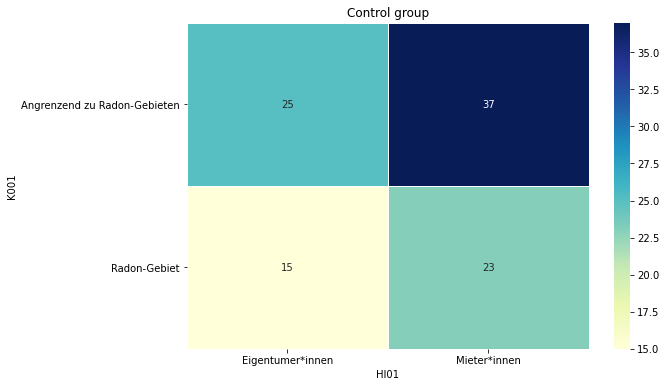

In [523]:
# Translation:
# Angrenzend zu Radon-Gebieten: Close to a radon area
# Radon-Gebiet: radon area
# Eigentumer*innen: homeowners
# Mieter*innen: tenants
cross_2_col(data_cg["K001"], data_cg["HI01"], "Control group")

#### Experimental group

In [524]:
# count n of participants that accomplished the survey in less than 5 min and 50 seconds (following quality check)
pd.set_option('display.max_columns', 500)
speedster_eg = data_eg[data_eg.TIME_SUM.astype(int) < 350]
len(speedster_eg.iloc[:,22:])

13

In [525]:
# to be removed
to_be_removed = speedster_eg
to_be_removed = to_be_removed.CASE
to_be_removed

1      379
16     401
17     404
20     407
31     418
47     436
78     474
123    526
151    556
159    565
163    569
168    574
193    627
Name: CASE, dtype: object

In [526]:
# check len before
len(data_eg)

206

In [527]:
# remove
data_eg = data_eg[~data_eg['CASE'].isin(to_be_removed)]

In [528]:
# check len after
len(data_eg)

193

In [529]:
# function to calculate relative cross tabulation by rows and display heatmap
def cross_2_col_eg(col1, col2, col3, title):
    c1 = pd.crosstab(col2, col1)
    c2 = pd.crosstab(col3, col1)
    fig, (ax1, ax2) = plt.subplots(1,2)
    sns.heatmap(c1, annot=True, cbar=False,  linewidths=.5, ax=ax1, cmap="YlGnBu")
    sns.heatmap(c2, annot=True, yticklabels=False, ax=ax2,  cmap="YlGnBu")
    ax2.set_ylabel(ylabel = "")
    plt.yticks(rotation=0) 
    fig.suptitle(title, fontsize=16)
    plt.savefig('Grafiken_Daten/' + title + '_eg', dpi = 300)
    plt.show()

# c is the chi-square
# p value
# dof is the degree of freedom (n of rows - 1) * (n of col -1)

In [530]:
# replace values in the q1
data_eg["HI01"] = data_eg["HI01"].map({"1": "Mieter*innen", "2": "Eigentumer*innen", "-9": "nicht beantwortet", "-1": "Keine Angabe"})# replace values in the q1
data_eg["RG01"] = data_eg["RG01"].map({"1": "Radon-Gebiet", "2": "Angrenzend zu Radon-Gebieten", "-9": "nicht beantwortet", "-1": "Keine Angabe"})
data_eg["RG02"] = data_eg["RG02"].map({"1": "Radon-Gebiet", "2": "Angrenzend zu Radon-Gebieten", "-9": "nicht beantwortet", "-1": "Keine Angabe"})

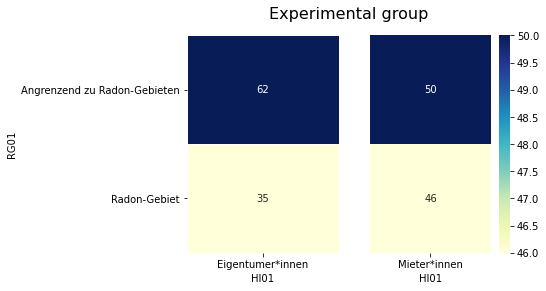

In [531]:
# Translation:
# Angrenzend zu Radon-Gebieten: Close to a radon area
# Radon-Gebiet: radon area
# Eigentumer*innen: homeowners
# Mieter*innen: tenants
cross_2_col_eg(data_eg["HI01"], data_eg["RG01"], data_eg["RG02"], "Experimental group")

## Creation of sub dataset for q1 and q2

In [532]:
# create a dictionary with answer codes and friendly names
codes_eg = data_eg.columns
labels = pd.read_csv(experimental_group, encoding="latin-1", nrows = 0, header = 1).columns
code_labels_dict_eg = dict(zip(codes_eg, labels))

In [533]:
# create a dictionary with answer codes and friendly names
codes_cg = data_cg.columns
labels = pd.read_csv(control_group, encoding="latin-1", nrows = 0, header = 1).columns
code_labels_dict_cg = dict(zip(codes_cg, labels))

In [534]:
# list of questions in q1
q1_items = ['SD01',
'SD02_01',
'SD03_01',
'SD04',
'SD05_01',
'SD06',
'SD07',
'HI01',
'HI02',
'HI03',
'HI04',
'HI05',
'HI06',
'VR01',
'VR02',
'VR03',
'VR03_01',
'VR03_02',
'VR03_03',
'VR03_04',
'VR03_05',
'VR04_01',
'VR04_02',
'VR04_03',
'VR04_04',
'VR04_05',
'VR04_06',
'VR05_01',
'VR05_02',
'VR05_03',
'VR06',
'HM01',
'HM02_01',
'HM03',
'HM04_01',
'HM05',
'HM06',
'HM07_01',
'HM07_02',
'HM07_03',
'HM07_04',
'HM07_05',
'HM07_06',
'K001',
'RG01',
'RG02']

In [535]:
# list of questions in the q2
q2_items = ['IS01_01',
'IS01_02',
'IS01_03',
'IS01_04',
'IS01_05',
'IS01_06',
'IS01_07',
'IS01_08',
'IS01_09',
'IS01_10',
'IS02_01',
'IS03_01',
'IO01',
'IO02',
'IO03',
'IO04',
'IO05',
'IO06',
'RW01_01',
'RW02_01',
'RW03_01',
'RW03_02',
'RW03_03',
'RW04_01',
'RW04_02',
'RW04_03',
'RW05_01',
'RW05_02',
'RW05_03',
'H101',
'H102_01',
'H102_02',
'H102_03',
'H102_04',
'H102_05',
'H102_06',
'H102_07',
'H103',
'H104_01',
'H104_02',
'H104_03',
'H105_01',
'H106_01',
'H201_01',
'H201_02',
'H202_01',
'H202_02',
'H202_03',
'CL01_01',
'CL01_02',
'CL01_03',
'CL01_04',
'CL01_05',
'CL01_06',
'CA01_01',
'CA01_02',
'CA01_03',
'CA01_04',
'CA01_05',
'CA01_06',
'CS01_01',
'CS01_02',
'CS01_03',
'CS01_04',
'CS01_05',
'CS01_06',
'US01_01',
'US01_02',
'US01_03',
'US01_04']

In [536]:
# list of items related to the interactions with the web pages (wps)
interactions_wps_items_cg = ['M501_01',
'M501_02',
'M501_03',
'M501_04',
'M501_05',
'M501_06',
'M502_01',
'M502_02',
'M502_03']

interactions_wps_items_eg = ['M101_01',
'M101_02',
'M101_03',
'M101_04',
'M101_05',
'M101_06',
'M101_07',
'M101_08',
'M101_09',
'M101_10',
'M101_11',
'M101_12',
'M101_13',
'M101_14',
'M101_15',
'M101_16',
'M201_01',
'M201_02',
'M201_03',
'M201_04',
'M201_05',
'M201_06',
'M201_07',
'M201_08',
'M201_09',
'M201_10',
'M201_11',
'M201_12',
'M201_13',
'M201_14',
'M201_15',
'M201_16',
'M301_01',
'M301_02',
'M301_03',
'M301_04',
'M301_05',
'M301_06',
'M301_07',
'M301_08',
'M301_09',
'M301_10',
'M301_11',
'M301_12',
'M301_13',
'M301_14',
'M301_15',
'M301_16',
'M401_01',
'M401_02',
'M401_03',
'M401_04',
'M401_05',
'M401_06',
'M401_07',
'M401_08',
'M401_09',
'M401_10',
'M401_11',
'M401_12',
'M401_13',
'M401_14',
'M401_15',
'M401_16']

In [537]:
# create a subset for q1 and data from the experimental group
q1_eg = data_eg[data_eg.columns.intersection(q1_items)]

In [538]:
# create a subset for the q1 and data from the control group
q1_cg = data_cg[data_cg.columns.intersection(q1_items)]

In [539]:
# create a subset for q2 and data from the experimental group
q2_eg = data_eg[data_eg.columns.intersection(q2_items)]

In [540]:
# create a subset for the q2 and data from the control group
q2_cg = data_cg[data_cg.columns.intersection(q2_items)]

In [541]:
# create a subset for the data related to the interactions with the web pages
interactions_wps_eg = data_eg[data_eg.columns.intersection(interactions_wps_items_eg)]
interactions_wps_eg

,M101_01,M101_02,M101_03,M101_04,M101_05,M101_06,M101_07,M101_08,M101_09,M101_10,M101_11,M101_12,M101_13,M101_14,M101_15,M101_16,M201_01,M201_02,M201_03,M201_04,M201_05,M201_06,M201_07,M201_08,M201_09,M201_10,M201_11,M201_12,M201_13,M201_14,M201_15,M201_16,M401_01,M401_02,M401_03,M401_04,M401_05,M401_06,M401_07,M401_08,M401_09,M401_10,M401_11,M401_12,M401_13,M401_14,M401_15,M401_16,M301_01,M301_02,M301_03,M301_04,M301_05,M301_06,M301_07,M301_08,M301_09,M301_10,M301_11,M301_12,M301_13,M301_14,M301_15,M301_16
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [542]:
# create a subset for the data related to the interactions with the web pages
interactions_wps_cg = data_cg[data_cg.columns.intersection(interactions_wps_items_cg)]
interactions_wps_cg

,M501_01,M501_02,M501_03,M501_04,M501_05,M501_06,M502_01,M502_02,M502_03
1,2,2,1,1,1,1,1,1,1
2,2,2,2,1,2,2,1,1,1
3,1,1,1,1,1,2,1,1,1
4,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
104,1,1,2,1,1,1,1,1,1
106,2,1,1,1,1,1,1,1,1
107,2,1,1,1,1,1,1,1,1
109,1,1,1,1,1,1,1,1,1


In [543]:
# check that the length of eg and cg related subsets is equal
len(interactions_wps_cg) == len(q2_cg) == len(q1_cg), len(interactions_wps_eg) == len(q2_eg) == len(q1_eg)

(True, True)

## Data transformation

### Interactions with the webpages

In [544]:
# replace values in the interactions_wps dataset
pd.options.mode.chained_assignment = None  # default='warn'
for column in interactions_wps_eg.columns:
    interactions_wps_eg[column] = interactions_wps_eg[column].map({"1": "not_clicked", "2": "clicked", "NaN": "not_clicked"})
interactions_wps_eg.head()
## since there were different wps for the eg, there are NaN > users who received a different version of the wp

,M101_01,M101_02,M101_03,M101_04,M101_05,M101_06,M101_07,M101_08,M101_09,M101_10,M101_11,M101_12,M101_13,M101_14,M101_15,M101_16,M201_01,M201_02,M201_03,M201_04,M201_05,M201_06,M201_07,M201_08,M201_09,M201_10,M201_11,M201_12,M201_13,M201_14,M201_15,M201_16,M401_01,M401_02,M401_03,M401_04,M401_05,M401_06,M401_07,M401_08,M401_09,M401_10,M401_11,M401_12,M401_13,M401_14,M401_15,M401_16,M301_01,M301_02,M301_03,M301_04,M301_05,M301_06,M301_07,M301_08,M301_09,M301_10,M301_11,M301_12,M301_13,M301_14,M301_15,M301_16
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_clicked,not_clicked,clicked,clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_clicked,clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [545]:
# replace values in the interactions_wps dataset
pd.options.mode.chained_assignment = None  # default='warn'
for column in interactions_wps_cg.columns:
    interactions_wps_cg[column] = interactions_wps_cg[column].map({"1": "not_clicked", "2": "clicked"})
interactions_wps_cg.head()

,M501_01,M501_02,M501_03,M501_04,M501_05,M501_06,M502_01,M502_02,M502_03
1,clicked,clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked
2,clicked,clicked,clicked,not_clicked,clicked,clicked,not_clicked,not_clicked,not_clicked
3,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,clicked,not_clicked,not_clicked,not_clicked
4,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked
5,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked


### Multiple choice items

In [546]:
# list of nein/ja items in the q1
# Nein > No
# Ja > Yes
multiple_choice_items = ['VR03_01',
'VR03_02',
'VR03_03',
'VR03_04',
'VR03_05']

In [547]:
# replace ja/nein values in the q1
# Nicht ausgewählt > not selected
# Ausgewählt > selected
# nicht beantwortet > not answered
for column in q1_eg[q1_eg.columns.intersection(multiple_choice_items)].columns:
    q1_eg[column] = q1_eg[column].map({"1": "Nicht ausgewählt", "2": "ausgewählt", "nan": "nicht beantwortet"})
q1_eg.head()

,SD01,SD02_01,SD03_01,SD04,SD05_01,SD06,SD07,HI01,HI02,HI03,HI04,HI05,HI06,VR01,VR02,VR03,VR03_01,VR03_02,VR03_03,VR03_04,VR03_05,VR04_01,VR04_02,VR04_03,VR04_04,VR04_05,VR04_06,VR05_01,VR05_02,VR05_03,VR06,HM01,HM02_01,HM03,HM04_01,HM05,HM06,HM07_01,HM07_02,HM07_03,HM07_04,HM07_05,HM07_06,RG01,RG02
2,1,1960,08228,5,2,1,1,Mieter*innen,1,2,1,3,2,2,6,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,3,2,3,2,3,1,2,2,2,2,1,NaN,1,NaN,1,1,3,2,2,2,3,3,NaN,Angrenzend zu Radon-Gebieten
3,1,1958,09113,4,2,1,1,Mieter*innen,1,2,3,3,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten
4,1,1963,01257,4,2,1,1,Mieter*innen,1,2,3,3,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radon-Gebiet
5,1,1979,94136,3,4,2,1,Eigentumer*innen,1,1,3,3,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten,NaN
6,2,1966,09122,4,1,1,1,Eigentumer*innen,1,2,3,3,4,2,6,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,2,3,3,-1,-1,-1,-1,-1,-1,2,1,NaN,1,NaN,1,1,-1,-1,-1,-1,-1,-1,Angrenzend zu Radon-Gebieten,NaN


In [548]:
# replace ja/nein values in the q1
for column in q1_cg[q1_cg.columns.intersection(multiple_choice_items)].columns:
    q1_cg[column] = q1_cg[column].map({"1": "Nicht ausgewählt", "2": "ausgewählt", "nan": "nicht beantwortet"})
q1_cg.head()

,SD01,SD02_01,SD03_01,SD04,SD05_01,SD06,SD07,HI01,HI02,HI03,HI04,HI05,HI06,VR01,VR02,VR03,VR03_01,VR03_02,VR03_03,VR03_04,VR03_05,VR04_01,VR04_02,VR04_03,VR04_04,VR04_05,VR04_06,VR05_01,VR05_02,VR05_03,VR06,HM01,HM02_01,HM03,HM04_01,HM05,HM06,HM07_01,HM07_02,HM07_03,HM07_04,HM07_05,HM07_06,K001
1,1,1968,09116,4,1,1,1,Mieter*innen,1,2,1,3,4,2,6,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,-1,3,3,-1,-1,-1,1,1,1,2,1,NaN,1,NaN,1,1,1,1,-1,1,1,1,Radon-Gebiet
2,2,1961,01108,5,2,1,2,Eigentumer*innen,1,1,3,3,3,2,6,1,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,Nicht ausgewählt,Nicht ausgewählt,4,1,3,4,4,1,3,3,3,2,1,NaN,1,NaN,1,1,4,1,4,-1,3,4,Angrenzend zu Radon-Gebieten
3,1,1965,83278,4,1,1,1,Mieter*innen,1,2,2,2,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten
4,2,1977,01723,4,3,2,1,Eigentumer*innen,2,1,2,3,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten
5,1,1982,01169,4,1,1,1,Mieter*innen,1,2,2,2,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radon-Gebiet


### Yes / No items

In [549]:
# list of nein/ja items in the q1
no_yes_q1 = ['SD06',
'HM01',
'SD07',
'HI02',
'VR01',
'HM03',
'HM05',
'HM06',
'VR06']

In [550]:
# replace ja/nein values in the q1
for column in q1_eg[q1_eg.columns.intersection(no_yes_q1)].columns:
    q1_eg[column] = q1_eg[column].map({"1": "Nein", "2": "Ja", "-9": "nicht beantwortet", "-1": "Keine Angabe"})
q1_eg.head()

,SD01,SD02_01,SD03_01,SD04,SD05_01,SD06,SD07,HI01,HI02,HI03,HI04,HI05,HI06,VR01,VR02,VR03,VR03_01,VR03_02,VR03_03,VR03_04,VR03_05,VR04_01,VR04_02,VR04_03,VR04_04,VR04_05,VR04_06,VR05_01,VR05_02,VR05_03,VR06,HM01,HM02_01,HM03,HM04_01,HM05,HM06,HM07_01,HM07_02,HM07_03,HM07_04,HM07_05,HM07_06,RG01,RG02
2,1,1960,08228,5,2,Nein,Nein,Mieter*innen,Nein,2,1,3,2,Ja,6,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,3,2,3,2,3,1,2,2,2,Ja,Nein,NaN,Nein,NaN,Nein,Nein,3,2,2,2,3,3,NaN,Angrenzend zu Radon-Gebieten
3,1,1958,09113,4,2,Nein,Nein,Mieter*innen,Nein,2,3,3,4,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten
4,1,1963,01257,4,2,Nein,Nein,Mieter*innen,Nein,2,3,3,4,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radon-Gebiet
5,1,1979,94136,3,4,Ja,Nein,Eigentumer*innen,Nein,1,3,3,3,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten,NaN
6,2,1966,09122,4,1,Nein,Nein,Eigentumer*innen,Nein,2,3,3,4,Ja,6,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,2,3,3,-1,-1,-1,-1,-1,-1,Ja,Nein,NaN,Nein,NaN,Nein,Nein,-1,-1,-1,-1,-1,-1,Angrenzend zu Radon-Gebieten,NaN


In [551]:
# replace ja/nein values in the q1
for column in q1_cg[q1_cg.columns.intersection(no_yes_q1)].columns:
    q1_cg[column] = q1_cg[column].map({"1": "Nein", "2": "Ja", "-9": "nicht beantwortet", "-1": "Keine Angabe"})
q1_cg.head()

,SD01,SD02_01,SD03_01,SD04,SD05_01,SD06,SD07,HI01,HI02,HI03,HI04,HI05,HI06,VR01,VR02,VR03,VR03_01,VR03_02,VR03_03,VR03_04,VR03_05,VR04_01,VR04_02,VR04_03,VR04_04,VR04_05,VR04_06,VR05_01,VR05_02,VR05_03,VR06,HM01,HM02_01,HM03,HM04_01,HM05,HM06,HM07_01,HM07_02,HM07_03,HM07_04,HM07_05,HM07_06,K001
1,1,1968,09116,4,1,Nein,Nein,Mieter*innen,Nein,2,1,3,4,Ja,6,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,-1,3,3,-1,-1,-1,1,1,1,Ja,Nein,NaN,Nein,NaN,Nein,Nein,1,1,-1,1,1,1,Radon-Gebiet
2,2,1961,01108,5,2,Nein,Ja,Eigentumer*innen,Nein,1,3,3,3,Ja,6,1,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,Nicht ausgewählt,Nicht ausgewählt,4,1,3,4,4,1,3,3,3,Ja,Nein,NaN,Nein,NaN,Nein,Nein,4,1,4,-1,3,4,Angrenzend zu Radon-Gebieten
3,1,1965,83278,4,1,Nein,Nein,Mieter*innen,Nein,2,2,2,3,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten
4,2,1977,01723,4,3,Ja,Nein,Eigentumer*innen,Ja,1,2,3,3,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten
5,1,1982,01169,4,1,Nein,Nein,Mieter*innen,Nein,2,2,2,4,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radon-Gebiet


In [552]:
# list of nein/ja items in the q2
no_yes_q2 = ["H101", "H103"]

In [553]:
# replace ja/nein values in the q2
for column in q2_eg[q2_eg.columns.intersection(no_yes_q2)].columns:
    q2_eg[column] = q2_eg[column].map({"1": "Nein", "2": "Ja", "-9": "nicht beantwortet", "-1": "Keine Angabe"})
q2_eg.head()

,IS01_01,IS01_02,IS01_03,IS01_04,IS01_05,IS01_06,IS01_07,IS01_08,IS01_09,IS01_10,IS02_01,IS03_01,IO01,IO02,IO03,IO04,IO05,IO06,RW01_01,RW02_01,RW03_01,RW03_02,RW03_03,RW04_01,RW04_02,RW04_03,RW05_01,RW05_02,RW05_03,H101,H102_01,H102_02,H102_03,H102_04,H102_05,H102_06,H102_07,H103,H104_01,H104_02,H104_03,H105_01,H106_01,H201_01,H201_02,H202_01,H202_02,H202_03,CL01_01,CL01_02,CL01_03,CL01_04,CL01_05,CL01_06,CA01_01,CA01_02,CA01_03,CA01_04,CA01_05,CA01_06,CS01_01,CS01_02,CS01_03,CS01_04,CS01_05,CS01_06,US01_01,US01_02,US01_03,US01_04
2,3,4,2,2,2,5,3,3,3,2,NaN,NaN,2,2,1,1,2,2,2,2,2,2,1,3,3,2,2,3,2,Nein,1,1,4,4,4,1,3,Keine Angabe,NaN,NaN,NaN,NaN,NaN,3,3,3,3,2,3,2,2,3,3,3,3,3,2,3,2,3,3,3,2,2,2,3,3,3,2,2
3,4,4,3,4,4,3,3,4,4,4,man sollte messen,nichts,2,2,1,1,2,2,NaN,3,2,2,2,3,3,3,3,3,3,Nein,3,-1,3,2,3,-1,-1,Keine Angabe,NaN,NaN,NaN,NaN,NaN,4,3,4,3,3,2,3,2,3,2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,2,2,2
4,5,5,5,5,5,5,5,5,5,5,NaN,NaN,-1,-1,-1,-1,-1,-1,NaN,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Nein,-1,-1,-1,-1,-1,-1,-1,Nein,-1,-1,-1,NaN,NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5,5,4,4,4,5,2,4,4,4,4,NaN,NaN,2,2,1,1,2,2,NaN,2,1,2,2,3,4,-1,3,4,4,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,4,3,3,3,2,3,2,3,2,2,3,2,3,2,1,2,3,2,3,3,2,3,3,3,3,4,3
6,4,3,3,3,4,3,3,4,4,3,NaN,NaN,2,2,-1,1,2,-1,2,2,-1,-1,-1,3,4,3,-1,-1,-1,Nein,-1,-1,-1,-1,3,-1,-1,Ja,NaN,NaN,NaN,NaN,NaN,3,3,3,3,-1,2,3,2,3,2,3,2,3,2,3,2,3,-1,-1,-1,-1,-1,-1,3,3,3,3


In [554]:
# replace ja/nein values in the q2
for column in q2_cg[q2_cg.columns.intersection(no_yes_q2)].columns:
    q2_cg[column] = q2_cg[column].map({"1": "Nein", "2": "Ja", "-9": "nicht beantwortet", "-1": "Keine Angabe"})
q2_cg.head()

,IS01_01,IS01_02,IS01_03,IS01_04,IS01_05,IS01_06,IS01_07,IS01_08,IS01_09,IS01_10,IS02_01,IS03_01,IO01,IO02,IO03,IO04,IO05,IO06,RW01_01,RW02_01,RW03_01,RW03_02,RW03_03,RW04_01,RW04_02,RW04_03,RW05_01,RW05_02,RW05_03,H101,H102_01,H102_02,H102_03,H102_04,H102_05,H102_06,H102_07,H103,H104_01,H104_02,H104_03,H105_01,H106_01,H201_01,H201_02,H202_01,H202_02,H202_03,CL01_01,CL01_02,CL01_03,CL01_04,CL01_05,CL01_06,CA01_01,CA01_02,CA01_03,CA01_04,CA01_05,CA01_06,CS01_01,CS01_02,CS01_03,CS01_04,CS01_05,CS01_06,US01_01,US01_02,US01_03,US01_04
1,4,4,3,3,3,2,3,3,3,3,sehr übersichtlich,habe das gefühl das dies ein weiterer versuch ...,-1,2,1,1,2,1,1,2,2,2,2,3,4,3,2,2,2,Nein,-1,1,-1,-1,4,1,4,Keine Angabe,NaN,NaN,NaN,NaN,NaN,4,2,3,3,-1,1,4,-1,4,1,3,1,4,3,3,1,-1,4,-1,-1,-1,-1,-1,1,-1,-1,-1
2,5,5,5,5,5,5,5,5,5,5,Sachlich und informativ,nichts,2,2,1,2,2,2,4,4,2,2,1,4,4,4,3,2,2,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,4,4,4,4,4,1,4,2,4,1,4,1,4,1,4,1,4,3,4,2,4,1,3,2,1,1,2
3,5,5,4,4,5,2,3,4,4,4,übersichtlich,viel Text,2,2,1,1,2,2,NaN,2,1,2,1,3,3,3,-1,2,2,Nein,-1,2,-1,3,3,-1,2,Ja,NaN,NaN,NaN,NaN,NaN,3,3,3,3,3,2,3,2,3,1,-1,2,3,-1,-1,3,3,2,3,-1,-1,3,3,3,3,2,2
4,4,5,4,5,5,2,5,5,4,3,NaN,NaN,2,2,1,2,2,2,NaN,2,-1,2,1,4,3,4,-1,-1,-1,Nein,2,2,4,4,4,4,4,Nein,4,4,4,NaN,NaN,3,4,-1,-1,-1,-1,3,2,3,2,4,2,4,3,3,3,4,-1,-1,-1,-1,-1,-1,3,4,4,4
5,4,4,4,4,4,2,4,4,4,3,gut zu verstehender text,nichts,1,-1,1,-1,1,-1,NaN,3,3,2,2,3,3,3,3,3,2,Nein,2,2,3,3,3,3,2,Nein,3,3,3,NaN,NaN,2,2,2,2,2,2,3,3,2,2,3,3,3,2,3,2,3,3,2,3,3,3,3,3,2,3,3


### Sociodemographic items

#### Sex

In [555]:
# replace values in the q1
# männlich > male
# weiblich > female
# nicht beantwortet > no answer
# keine angabe > no answer
q1_eg["SD01"] = q1_eg["SD01"].map({"1": "Männlich", "2": "Weiblich", "3": "Divers", "-9": "nicht beantwortet", "-1": "Keine Angabe"})
q1_eg.head()

,SD01,SD02_01,SD03_01,SD04,SD05_01,SD06,SD07,HI01,HI02,HI03,HI04,HI05,HI06,VR01,VR02,VR03,VR03_01,VR03_02,VR03_03,VR03_04,VR03_05,VR04_01,VR04_02,VR04_03,VR04_04,VR04_05,VR04_06,VR05_01,VR05_02,VR05_03,VR06,HM01,HM02_01,HM03,HM04_01,HM05,HM06,HM07_01,HM07_02,HM07_03,HM07_04,HM07_05,HM07_06,RG01,RG02
2,Männlich,1960,08228,5,2,Nein,Nein,Mieter*innen,Nein,2,1,3,2,Ja,6,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,3,2,3,2,3,1,2,2,2,Ja,Nein,NaN,Nein,NaN,Nein,Nein,3,2,2,2,3,3,NaN,Angrenzend zu Radon-Gebieten
3,Männlich,1958,09113,4,2,Nein,Nein,Mieter*innen,Nein,2,3,3,4,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten
4,Männlich,1963,01257,4,2,Nein,Nein,Mieter*innen,Nein,2,3,3,4,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radon-Gebiet
5,Männlich,1979,94136,3,4,Ja,Nein,Eigentumer*innen,Nein,1,3,3,3,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten,NaN
6,Weiblich,1966,09122,4,1,Nein,Nein,Eigentumer*innen,Nein,2,3,3,4,Ja,6,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,2,3,3,-1,-1,-1,-1,-1,-1,Ja,Nein,NaN,Nein,NaN,Nein,Nein,-1,-1,-1,-1,-1,-1,Angrenzend zu Radon-Gebieten,NaN


In [556]:
# replace values in the q1
q1_cg["SD01"] = q1_cg["SD01"].map({"1": "Männlich", "2": "Weiblich", "3": "Divers", "-9": "nicht beantwortet", "-1": "Keine Angabe"})
q1_cg.head()

,SD01,SD02_01,SD03_01,SD04,SD05_01,SD06,SD07,HI01,HI02,HI03,HI04,HI05,HI06,VR01,VR02,VR03,VR03_01,VR03_02,VR03_03,VR03_04,VR03_05,VR04_01,VR04_02,VR04_03,VR04_04,VR04_05,VR04_06,VR05_01,VR05_02,VR05_03,VR06,HM01,HM02_01,HM03,HM04_01,HM05,HM06,HM07_01,HM07_02,HM07_03,HM07_04,HM07_05,HM07_06,K001
1,Männlich,1968,09116,4,1,Nein,Nein,Mieter*innen,Nein,2,1,3,4,Ja,6,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,-1,3,3,-1,-1,-1,1,1,1,Ja,Nein,NaN,Nein,NaN,Nein,Nein,1,1,-1,1,1,1,Radon-Gebiet
2,Weiblich,1961,01108,5,2,Nein,Ja,Eigentumer*innen,Nein,1,3,3,3,Ja,6,1,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,Nicht ausgewählt,Nicht ausgewählt,4,1,3,4,4,1,3,3,3,Ja,Nein,NaN,Nein,NaN,Nein,Nein,4,1,4,-1,3,4,Angrenzend zu Radon-Gebieten
3,Männlich,1965,83278,4,1,Nein,Nein,Mieter*innen,Nein,2,2,2,3,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten
4,Weiblich,1977,01723,4,3,Ja,Nein,Eigentumer*innen,Ja,1,2,3,3,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten
5,Männlich,1982,01169,4,1,Nein,Nein,Mieter*innen,Nein,2,2,2,4,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radon-Gebiet


#### Education

In [557]:
# replace values in the q1
# noch schüler > still in school
# schule beendet ohne abschluss > school terminated without graduation
# schulabschluss > high school degree
# ausbildung > professional training
# hochschulabschluss > university degree
# sonstiges > various
q1_eg["SD04"] = q1_eg["SD04"].map({"1": "Noch Schüler", "2": "Schule beendet ohne Abschluss", "3": "Schulabschluß", "4": "Ausbildung", "5": "Hochschulabschluß", "6": "Sonstiges", "-9": "nicht beantwortet", "-1": "Keine Angabe"})
q1_eg.head()

,SD01,SD02_01,SD03_01,SD04,SD05_01,SD06,SD07,HI01,HI02,HI03,HI04,HI05,HI06,VR01,VR02,VR03,VR03_01,VR03_02,VR03_03,VR03_04,VR03_05,VR04_01,VR04_02,VR04_03,VR04_04,VR04_05,VR04_06,VR05_01,VR05_02,VR05_03,VR06,HM01,HM02_01,HM03,HM04_01,HM05,HM06,HM07_01,HM07_02,HM07_03,HM07_04,HM07_05,HM07_06,RG01,RG02
2,Männlich,1960,08228,Hochschulabschluß,2,Nein,Nein,Mieter*innen,Nein,2,1,3,2,Ja,6,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,3,2,3,2,3,1,2,2,2,Ja,Nein,NaN,Nein,NaN,Nein,Nein,3,2,2,2,3,3,NaN,Angrenzend zu Radon-Gebieten
3,Männlich,1958,09113,Ausbildung,2,Nein,Nein,Mieter*innen,Nein,2,3,3,4,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten
4,Männlich,1963,01257,Ausbildung,2,Nein,Nein,Mieter*innen,Nein,2,3,3,4,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radon-Gebiet
5,Männlich,1979,94136,Schulabschluß,4,Ja,Nein,Eigentumer*innen,Nein,1,3,3,3,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten,NaN
6,Weiblich,1966,09122,Ausbildung,1,Nein,Nein,Eigentumer*innen,Nein,2,3,3,4,Ja,6,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,2,3,3,-1,-1,-1,-1,-1,-1,Ja,Nein,NaN,Nein,NaN,Nein,Nein,-1,-1,-1,-1,-1,-1,Angrenzend zu Radon-Gebieten,NaN


In [558]:
# replace values in the q1
q1_cg["SD04"] = q1_cg["SD04"].map({"1": "Noch Schüler", "2": "Schule beendet ohne Abschluss", "3": "Schulabschluß", "4": "Ausbildung", "5": "Hochschulabschluß", "6": "Sonstiges", "-9": "nicht beantwortet", "-1": "Keine Angabe"})
q1_cg.head()

,SD01,SD02_01,SD03_01,SD04,SD05_01,SD06,SD07,HI01,HI02,HI03,HI04,HI05,HI06,VR01,VR02,VR03,VR03_01,VR03_02,VR03_03,VR03_04,VR03_05,VR04_01,VR04_02,VR04_03,VR04_04,VR04_05,VR04_06,VR05_01,VR05_02,VR05_03,VR06,HM01,HM02_01,HM03,HM04_01,HM05,HM06,HM07_01,HM07_02,HM07_03,HM07_04,HM07_05,HM07_06,K001
1,Männlich,1968,09116,Ausbildung,1,Nein,Nein,Mieter*innen,Nein,2,1,3,4,Ja,6,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,-1,3,3,-1,-1,-1,1,1,1,Ja,Nein,NaN,Nein,NaN,Nein,Nein,1,1,-1,1,1,1,Radon-Gebiet
2,Weiblich,1961,01108,Hochschulabschluß,2,Nein,Ja,Eigentumer*innen,Nein,1,3,3,3,Ja,6,1,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,Nicht ausgewählt,Nicht ausgewählt,4,1,3,4,4,1,3,3,3,Ja,Nein,NaN,Nein,NaN,Nein,Nein,4,1,4,-1,3,4,Angrenzend zu Radon-Gebieten
3,Männlich,1965,83278,Ausbildung,1,Nein,Nein,Mieter*innen,Nein,2,2,2,3,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten
4,Weiblich,1977,01723,Ausbildung,3,Ja,Nein,Eigentumer*innen,Ja,1,2,3,3,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten
5,Männlich,1982,01169,Ausbildung,1,Nein,Nein,Mieter*innen,Nein,2,2,2,4,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radon-Gebiet


### House and ownership related items

#### Building typology

In [559]:
# replace values in the q1
# in einem  Ein- oder Zweifamilienhaus > single or semi detached house
# in einem Mehrfamilienhaus oder einer Wohnung > multi detached house or apartment
q1_eg["HI03"] = q1_eg["HI03"].map({"1": "in einem  Ein- oder Zweifamilienhaus", "2": "in einem Mehrfamilienhaus oder einer Wohnung", "-9": "nicht beantwortet", "-1": "Keine Angabe"})
q1_eg.head()

,SD01,SD02_01,SD03_01,SD04,SD05_01,SD06,SD07,HI01,HI02,HI03,HI04,HI05,HI06,VR01,VR02,VR03,VR03_01,VR03_02,VR03_03,VR03_04,VR03_05,VR04_01,VR04_02,VR04_03,VR04_04,VR04_05,VR04_06,VR05_01,VR05_02,VR05_03,VR06,HM01,HM02_01,HM03,HM04_01,HM05,HM06,HM07_01,HM07_02,HM07_03,HM07_04,HM07_05,HM07_06,RG01,RG02
2,Männlich,1960,08228,Hochschulabschluß,2,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,1,3,2,Ja,6,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,3,2,3,2,3,1,2,2,2,Ja,Nein,NaN,Nein,NaN,Nein,Nein,3,2,2,2,3,3,NaN,Angrenzend zu Radon-Gebieten
3,Männlich,1958,09113,Ausbildung,2,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,3,3,4,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten
4,Männlich,1963,01257,Ausbildung,2,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,3,3,4,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radon-Gebiet
5,Männlich,1979,94136,Schulabschluß,4,Ja,Nein,Eigentumer*innen,Nein,in einem Ein- oder Zweifamilienhaus,3,3,3,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten,NaN
6,Weiblich,1966,09122,Ausbildung,1,Nein,Nein,Eigentumer*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,3,3,4,Ja,6,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,2,3,3,-1,-1,-1,-1,-1,-1,Ja,Nein,NaN,Nein,NaN,Nein,Nein,-1,-1,-1,-1,-1,-1,Angrenzend zu Radon-Gebieten,NaN


In [560]:
# replace values in the q1
q1_cg["HI03"] = q1_cg["HI03"].map({"1": "in einem  Ein- oder Zweifamilienhaus", "2": "in einem Mehrfamilienhaus oder einer Wohnung", "-9": "nicht beantwortet", "-1": "Keine Angabe"})
q1_cg.head()

,SD01,SD02_01,SD03_01,SD04,SD05_01,SD06,SD07,HI01,HI02,HI03,HI04,HI05,HI06,VR01,VR02,VR03,VR03_01,VR03_02,VR03_03,VR03_04,VR03_05,VR04_01,VR04_02,VR04_03,VR04_04,VR04_05,VR04_06,VR05_01,VR05_02,VR05_03,VR06,HM01,HM02_01,HM03,HM04_01,HM05,HM06,HM07_01,HM07_02,HM07_03,HM07_04,HM07_05,HM07_06,K001
1,Männlich,1968,09116,Ausbildung,1,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,1,3,4,Ja,6,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,-1,3,3,-1,-1,-1,1,1,1,Ja,Nein,NaN,Nein,NaN,Nein,Nein,1,1,-1,1,1,1,Radon-Gebiet
2,Weiblich,1961,01108,Hochschulabschluß,2,Nein,Ja,Eigentumer*innen,Nein,in einem Ein- oder Zweifamilienhaus,3,3,3,Ja,6,1,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,Nicht ausgewählt,Nicht ausgewählt,4,1,3,4,4,1,3,3,3,Ja,Nein,NaN,Nein,NaN,Nein,Nein,4,1,4,-1,3,4,Angrenzend zu Radon-Gebieten
3,Männlich,1965,83278,Ausbildung,1,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,2,2,3,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten
4,Weiblich,1977,01723,Ausbildung,3,Ja,Nein,Eigentumer*innen,Ja,in einem Ein- oder Zweifamilienhaus,2,3,3,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten
5,Männlich,1982,01169,Ausbildung,1,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,2,2,4,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radon-Gebiet


#### Length of residence

In [561]:
# replace values in the q1
# Jahre > years
q1_eg["HI04"] = q1_eg["HI04"].map({"1": "0 bis 5 Jahres", "2": "6 bis 10 Jahre", "3": "länger als 10 Jahre", "-9": "nicht beantwortet", "-1": "Keine Angabe"})
q1_eg.head()

,SD01,SD02_01,SD03_01,SD04,SD05_01,SD06,SD07,HI01,HI02,HI03,HI04,HI05,HI06,VR01,VR02,VR03,VR03_01,VR03_02,VR03_03,VR03_04,VR03_05,VR04_01,VR04_02,VR04_03,VR04_04,VR04_05,VR04_06,VR05_01,VR05_02,VR05_03,VR06,HM01,HM02_01,HM03,HM04_01,HM05,HM06,HM07_01,HM07_02,HM07_03,HM07_04,HM07_05,HM07_06,RG01,RG02
2,Männlich,1960,08228,Hochschulabschluß,2,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,0 bis 5 Jahres,3,2,Ja,6,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,3,2,3,2,3,1,2,2,2,Ja,Nein,NaN,Nein,NaN,Nein,Nein,3,2,2,2,3,3,NaN,Angrenzend zu Radon-Gebieten
3,Männlich,1958,09113,Ausbildung,2,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,länger als 10 Jahre,3,4,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten
4,Männlich,1963,01257,Ausbildung,2,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,länger als 10 Jahre,3,4,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radon-Gebiet
5,Männlich,1979,94136,Schulabschluß,4,Ja,Nein,Eigentumer*innen,Nein,in einem Ein- oder Zweifamilienhaus,länger als 10 Jahre,3,3,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten,NaN
6,Weiblich,1966,09122,Ausbildung,1,Nein,Nein,Eigentumer*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,länger als 10 Jahre,3,4,Ja,6,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,2,3,3,-1,-1,-1,-1,-1,-1,Ja,Nein,NaN,Nein,NaN,Nein,Nein,-1,-1,-1,-1,-1,-1,Angrenzend zu Radon-Gebieten,NaN


In [562]:
# replace values in the q1
q1_cg["HI04"] = q1_cg["HI04"].map({"1": "0 bis 5 Jahres", "2": "6 bis 10 Jahre", "3": "länger als 10 Jahre", "-9": "nicht beantwortet", "-1": "Keine Angabe"})
q1_cg.head()

,SD01,SD02_01,SD03_01,SD04,SD05_01,SD06,SD07,HI01,HI02,HI03,HI04,HI05,HI06,VR01,VR02,VR03,VR03_01,VR03_02,VR03_03,VR03_04,VR03_05,VR04_01,VR04_02,VR04_03,VR04_04,VR04_05,VR04_06,VR05_01,VR05_02,VR05_03,VR06,HM01,HM02_01,HM03,HM04_01,HM05,HM06,HM07_01,HM07_02,HM07_03,HM07_04,HM07_05,HM07_06,K001
1,Männlich,1968,09116,Ausbildung,1,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,0 bis 5 Jahres,3,4,Ja,6,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,-1,3,3,-1,-1,-1,1,1,1,Ja,Nein,NaN,Nein,NaN,Nein,Nein,1,1,-1,1,1,1,Radon-Gebiet
2,Weiblich,1961,01108,Hochschulabschluß,2,Nein,Ja,Eigentumer*innen,Nein,in einem Ein- oder Zweifamilienhaus,länger als 10 Jahre,3,3,Ja,6,1,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,Nicht ausgewählt,Nicht ausgewählt,4,1,3,4,4,1,3,3,3,Ja,Nein,NaN,Nein,NaN,Nein,Nein,4,1,4,-1,3,4,Angrenzend zu Radon-Gebieten
3,Männlich,1965,83278,Ausbildung,1,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,6 bis 10 Jahre,2,3,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten
4,Weiblich,1977,01723,Ausbildung,3,Ja,Nein,Eigentumer*innen,Ja,in einem Ein- oder Zweifamilienhaus,6 bis 10 Jahre,3,3,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten
5,Männlich,1982,01169,Ausbildung,1,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,6 bis 10 Jahre,2,4,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radon-Gebiet


#### How long are you planning to live there

In [563]:
# replace values in the q1
q1_eg["HI05"] = q1_eg["HI05"].map({"1": "0 bis 5 Jahres", "2": "6 bis 10 Jahre", "3": "länger als 10 Jahre", "-9": "nicht beantwortet", "-1": "Keine Angabe"})
q1_eg.head()

,SD01,SD02_01,SD03_01,SD04,SD05_01,SD06,SD07,HI01,HI02,HI03,HI04,HI05,HI06,VR01,VR02,VR03,VR03_01,VR03_02,VR03_03,VR03_04,VR03_05,VR04_01,VR04_02,VR04_03,VR04_04,VR04_05,VR04_06,VR05_01,VR05_02,VR05_03,VR06,HM01,HM02_01,HM03,HM04_01,HM05,HM06,HM07_01,HM07_02,HM07_03,HM07_04,HM07_05,HM07_06,RG01,RG02
2,Männlich,1960,08228,Hochschulabschluß,2,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,0 bis 5 Jahres,länger als 10 Jahre,2,Ja,6,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,3,2,3,2,3,1,2,2,2,Ja,Nein,NaN,Nein,NaN,Nein,Nein,3,2,2,2,3,3,NaN,Angrenzend zu Radon-Gebieten
3,Männlich,1958,09113,Ausbildung,2,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,länger als 10 Jahre,länger als 10 Jahre,4,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten
4,Männlich,1963,01257,Ausbildung,2,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,länger als 10 Jahre,länger als 10 Jahre,4,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radon-Gebiet
5,Männlich,1979,94136,Schulabschluß,4,Ja,Nein,Eigentumer*innen,Nein,in einem Ein- oder Zweifamilienhaus,länger als 10 Jahre,länger als 10 Jahre,3,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten,NaN
6,Weiblich,1966,09122,Ausbildung,1,Nein,Nein,Eigentumer*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,länger als 10 Jahre,länger als 10 Jahre,4,Ja,6,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,2,3,3,-1,-1,-1,-1,-1,-1,Ja,Nein,NaN,Nein,NaN,Nein,Nein,-1,-1,-1,-1,-1,-1,Angrenzend zu Radon-Gebieten,NaN


In [564]:
# replace values in the q1
q1_cg["HI05"] = q1_cg["HI05"].map({"1": "0 bis 5 Jahres", "2": "6 bis 10 Jahre", "3": "länger als 10 Jahre", "-9": "nicht beantwortet", "-1": "Keine Angabe"})
q1_cg.head()

,SD01,SD02_01,SD03_01,SD04,SD05_01,SD06,SD07,HI01,HI02,HI03,HI04,HI05,HI06,VR01,VR02,VR03,VR03_01,VR03_02,VR03_03,VR03_04,VR03_05,VR04_01,VR04_02,VR04_03,VR04_04,VR04_05,VR04_06,VR05_01,VR05_02,VR05_03,VR06,HM01,HM02_01,HM03,HM04_01,HM05,HM06,HM07_01,HM07_02,HM07_03,HM07_04,HM07_05,HM07_06,K001
1,Männlich,1968,09116,Ausbildung,1,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,0 bis 5 Jahres,länger als 10 Jahre,4,Ja,6,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,-1,3,3,-1,-1,-1,1,1,1,Ja,Nein,NaN,Nein,NaN,Nein,Nein,1,1,-1,1,1,1,Radon-Gebiet
2,Weiblich,1961,01108,Hochschulabschluß,2,Nein,Ja,Eigentumer*innen,Nein,in einem Ein- oder Zweifamilienhaus,länger als 10 Jahre,länger als 10 Jahre,3,Ja,6,1,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,Nicht ausgewählt,Nicht ausgewählt,4,1,3,4,4,1,3,3,3,Ja,Nein,NaN,Nein,NaN,Nein,Nein,4,1,4,-1,3,4,Angrenzend zu Radon-Gebieten
3,Männlich,1965,83278,Ausbildung,1,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,6 bis 10 Jahre,6 bis 10 Jahre,3,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten
4,Weiblich,1977,01723,Ausbildung,3,Ja,Nein,Eigentumer*innen,Ja,in einem Ein- oder Zweifamilienhaus,6 bis 10 Jahre,länger als 10 Jahre,3,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten
5,Männlich,1982,01169,Ausbildung,1,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,6 bis 10 Jahre,6 bis 10 Jahre,4,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radon-Gebiet


#### Floor

In [565]:
# replace values in the q1
# Souterrain > souterrain
# Erdgeschoss > ground floor
# Etage > floor
q1_eg["HI06"] = q1_eg["HI06"].map({"1": "Souterrain", "2": "Erdgeschoß", "3": "1. Etage", "4": "2. Etage oder höher", "-9": "nicht beantwortet", "-1": "Keine Angabe"})
q1_eg.head()

,SD01,SD02_01,SD03_01,SD04,SD05_01,SD06,SD07,HI01,HI02,HI03,HI04,HI05,HI06,VR01,VR02,VR03,VR03_01,VR03_02,VR03_03,VR03_04,VR03_05,VR04_01,VR04_02,VR04_03,VR04_04,VR04_05,VR04_06,VR05_01,VR05_02,VR05_03,VR06,HM01,HM02_01,HM03,HM04_01,HM05,HM06,HM07_01,HM07_02,HM07_03,HM07_04,HM07_05,HM07_06,RG01,RG02
2,Männlich,1960,08228,Hochschulabschluß,2,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,0 bis 5 Jahres,länger als 10 Jahre,Erdgeschoß,Ja,6,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,3,2,3,2,3,1,2,2,2,Ja,Nein,NaN,Nein,NaN,Nein,Nein,3,2,2,2,3,3,NaN,Angrenzend zu Radon-Gebieten
3,Männlich,1958,09113,Ausbildung,2,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,länger als 10 Jahre,länger als 10 Jahre,2. Etage oder höher,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten
4,Männlich,1963,01257,Ausbildung,2,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,länger als 10 Jahre,länger als 10 Jahre,2. Etage oder höher,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radon-Gebiet
5,Männlich,1979,94136,Schulabschluß,4,Ja,Nein,Eigentumer*innen,Nein,in einem Ein- oder Zweifamilienhaus,länger als 10 Jahre,länger als 10 Jahre,1. Etage,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten,NaN
6,Weiblich,1966,09122,Ausbildung,1,Nein,Nein,Eigentumer*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,länger als 10 Jahre,länger als 10 Jahre,2. Etage oder höher,Ja,6,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,2,3,3,-1,-1,-1,-1,-1,-1,Ja,Nein,NaN,Nein,NaN,Nein,Nein,-1,-1,-1,-1,-1,-1,Angrenzend zu Radon-Gebieten,NaN


In [566]:
# replace values in the q1
q1_cg["HI06"] = q1_cg["HI06"].map({"1": "Souterrain", "2": "Erdgeschoß", "3": "1. Etage", "4": "2. Etage oder höher", "-9": "nicht beantwortet", "-1": "Keine Angabe"})
q1_eg.head()

,SD01,SD02_01,SD03_01,SD04,SD05_01,SD06,SD07,HI01,HI02,HI03,HI04,HI05,HI06,VR01,VR02,VR03,VR03_01,VR03_02,VR03_03,VR03_04,VR03_05,VR04_01,VR04_02,VR04_03,VR04_04,VR04_05,VR04_06,VR05_01,VR05_02,VR05_03,VR06,HM01,HM02_01,HM03,HM04_01,HM05,HM06,HM07_01,HM07_02,HM07_03,HM07_04,HM07_05,HM07_06,RG01,RG02
2,Männlich,1960,08228,Hochschulabschluß,2,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,0 bis 5 Jahres,länger als 10 Jahre,Erdgeschoß,Ja,6,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,3,2,3,2,3,1,2,2,2,Ja,Nein,NaN,Nein,NaN,Nein,Nein,3,2,2,2,3,3,NaN,Angrenzend zu Radon-Gebieten
3,Männlich,1958,09113,Ausbildung,2,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,länger als 10 Jahre,länger als 10 Jahre,2. Etage oder höher,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten
4,Männlich,1963,01257,Ausbildung,2,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,länger als 10 Jahre,länger als 10 Jahre,2. Etage oder höher,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radon-Gebiet
5,Männlich,1979,94136,Schulabschluß,4,Ja,Nein,Eigentumer*innen,Nein,in einem Ein- oder Zweifamilienhaus,länger als 10 Jahre,länger als 10 Jahre,1. Etage,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten,NaN
6,Weiblich,1966,09122,Ausbildung,1,Nein,Nein,Eigentumer*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,länger als 10 Jahre,länger als 10 Jahre,2. Etage oder höher,Ja,6,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,2,3,3,-1,-1,-1,-1,-1,-1,Ja,Nein,NaN,Nein,NaN,Nein,Nein,-1,-1,-1,-1,-1,-1,Angrenzend zu Radon-Gebieten,NaN


### Knowledge about radon

#### What is radon?

In [567]:
# replace values in the q1
# Alarmsystem > alarmsystem
# Fahrrad > bike
# Softwarehersteller > Softwared producer
# mathematischer Algorithmus > math algorithm
# Maklersoftware > Investor software
# Edelgas > noble gas
# Energiesparlampe > energy saving bulb 
q1_eg["VR02"] = q1_eg["VR02"].map({"1": "Alarmsystem", "2": "Fahrrad", "3": "Softwarehersteller", "4": "mathematischer Algorithmus", "5": "Maklersoftware", "6": "Edelgas", "7": "Energiesparlampe", "-9": "nicht beantwortet", "-1": "Keine Angabe"})
q1_eg.head()

,SD01,SD02_01,SD03_01,SD04,SD05_01,SD06,SD07,HI01,HI02,HI03,HI04,HI05,HI06,VR01,VR02,VR03,VR03_01,VR03_02,VR03_03,VR03_04,VR03_05,VR04_01,VR04_02,VR04_03,VR04_04,VR04_05,VR04_06,VR05_01,VR05_02,VR05_03,VR06,HM01,HM02_01,HM03,HM04_01,HM05,HM06,HM07_01,HM07_02,HM07_03,HM07_04,HM07_05,HM07_06,RG01,RG02
2,Männlich,1960,08228,Hochschulabschluß,2,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,0 bis 5 Jahres,länger als 10 Jahre,Erdgeschoß,Ja,Edelgas,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,3,2,3,2,3,1,2,2,2,Ja,Nein,NaN,Nein,NaN,Nein,Nein,3,2,2,2,3,3,NaN,Angrenzend zu Radon-Gebieten
3,Männlich,1958,09113,Ausbildung,2,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,länger als 10 Jahre,länger als 10 Jahre,2. Etage oder höher,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten
4,Männlich,1963,01257,Ausbildung,2,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,länger als 10 Jahre,länger als 10 Jahre,2. Etage oder höher,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radon-Gebiet
5,Männlich,1979,94136,Schulabschluß,4,Ja,Nein,Eigentumer*innen,Nein,in einem Ein- oder Zweifamilienhaus,länger als 10 Jahre,länger als 10 Jahre,1. Etage,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten,NaN
6,Weiblich,1966,09122,Ausbildung,1,Nein,Nein,Eigentumer*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,länger als 10 Jahre,länger als 10 Jahre,2. Etage oder höher,Ja,Edelgas,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,2,3,3,-1,-1,-1,-1,-1,-1,Ja,Nein,NaN,Nein,NaN,Nein,Nein,-1,-1,-1,-1,-1,-1,Angrenzend zu Radon-Gebieten,NaN


In [568]:
# replace values in the q1
q1_cg["VR02"] = q1_cg["VR02"].map({"1": "Alarmsystem", "2": "Fahrrad", "3": "Softwarehersteller", "4": "mathematischer Algorithmus", "5": "Maklersoftware", "6": "Edelgas", "7": "Energiesparlampe", "-9": "nicht beantwortet", "-1": "Keine Angabe"})
q1_cg.head()

,SD01,SD02_01,SD03_01,SD04,SD05_01,SD06,SD07,HI01,HI02,HI03,HI04,HI05,HI06,VR01,VR02,VR03,VR03_01,VR03_02,VR03_03,VR03_04,VR03_05,VR04_01,VR04_02,VR04_03,VR04_04,VR04_05,VR04_06,VR05_01,VR05_02,VR05_03,VR06,HM01,HM02_01,HM03,HM04_01,HM05,HM06,HM07_01,HM07_02,HM07_03,HM07_04,HM07_05,HM07_06,K001
1,Männlich,1968,09116,Ausbildung,1,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,0 bis 5 Jahres,länger als 10 Jahre,2. Etage oder höher,Ja,Edelgas,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,-1,3,3,-1,-1,-1,1,1,1,Ja,Nein,NaN,Nein,NaN,Nein,Nein,1,1,-1,1,1,1,Radon-Gebiet
2,Weiblich,1961,01108,Hochschulabschluß,2,Nein,Ja,Eigentumer*innen,Nein,in einem Ein- oder Zweifamilienhaus,länger als 10 Jahre,länger als 10 Jahre,1. Etage,Ja,Edelgas,1,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,Nicht ausgewählt,Nicht ausgewählt,4,1,3,4,4,1,3,3,3,Ja,Nein,NaN,Nein,NaN,Nein,Nein,4,1,4,-1,3,4,Angrenzend zu Radon-Gebieten
3,Männlich,1965,83278,Ausbildung,1,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,6 bis 10 Jahre,6 bis 10 Jahre,1. Etage,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten
4,Weiblich,1977,01723,Ausbildung,3,Ja,Nein,Eigentumer*innen,Ja,in einem Ein- oder Zweifamilienhaus,6 bis 10 Jahre,länger als 10 Jahre,1. Etage,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten
5,Männlich,1982,01169,Ausbildung,1,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,6 bis 10 Jahre,6 bis 10 Jahre,2. Etage oder höher,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radon-Gebiet


### Agree / disagree items

In [569]:
# list of agree / disagree items
agree_disagree_q2 = ['CL01_01',
    'CL01_02',
    'CL01_03',
    'CL01_04',
    'CL01_05',
    'CL01_06',
    'CA01_01',
    'CA01_02',
    'CA01_03',
    'CA01_04',
    'CA01_05',
    'CA01_06',
    'CS01_01',
    'CS01_02',
    'CS01_03',
    'CS01_04',
    'CS01_05',
    'CS01_06',
    'US01_01',
    'US01_02',
    'US01_03',
    'US01_04',
    'RW04_01',
    'RW04_02',
    'RW04_03']

## Uncertainty score

In [570]:
uncertainty_items = ['US01_01', 'US01_02', 'US01_03', 'US01_04']

In [571]:
# replace agree / disagree in the q1
for column in q2_cg[q2_cg.columns.intersection(uncertainty_items)].columns:
    q2_cg[column] = q2_cg[column].map({"1": 1, "2": 2, "3": 3, "4": 4,  "-9": 0, "-1": 0})
q2_cg.head()

,IS01_01,IS01_02,IS01_03,IS01_04,IS01_05,IS01_06,IS01_07,IS01_08,IS01_09,IS01_10,IS02_01,IS03_01,IO01,IO02,IO03,IO04,IO05,IO06,RW01_01,RW02_01,RW03_01,RW03_02,RW03_03,RW04_01,RW04_02,RW04_03,RW05_01,RW05_02,RW05_03,H101,H102_01,H102_02,H102_03,H102_04,H102_05,H102_06,H102_07,H103,H104_01,H104_02,H104_03,H105_01,H106_01,H201_01,H201_02,H202_01,H202_02,H202_03,CL01_01,CL01_02,CL01_03,CL01_04,CL01_05,CL01_06,CA01_01,CA01_02,CA01_03,CA01_04,CA01_05,CA01_06,CS01_01,CS01_02,CS01_03,CS01_04,CS01_05,CS01_06,US01_01,US01_02,US01_03,US01_04
1,4,4,3,3,3,2,3,3,3,3,sehr übersichtlich,habe das gefühl das dies ein weiterer versuch ...,-1,2,1,1,2,1,1,2,2,2,2,3,4,3,2,2,2,Nein,-1,1,-1,-1,4,1,4,Keine Angabe,NaN,NaN,NaN,NaN,NaN,4,2,3,3,-1,1,4,-1,4,1,3,1,4,3,3,1,-1,4,-1,-1,-1,-1,-1,1,0,0,0
2,5,5,5,5,5,5,5,5,5,5,Sachlich und informativ,nichts,2,2,1,2,2,2,4,4,2,2,1,4,4,4,3,2,2,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,4,4,4,4,4,1,4,2,4,1,4,1,4,1,4,1,4,3,4,2,4,1,3,2,1,1,2
3,5,5,4,4,5,2,3,4,4,4,übersichtlich,viel Text,2,2,1,1,2,2,NaN,2,1,2,1,3,3,3,-1,2,2,Nein,-1,2,-1,3,3,-1,2,Ja,NaN,NaN,NaN,NaN,NaN,3,3,3,3,3,2,3,2,3,1,-1,2,3,-1,-1,3,3,2,3,-1,-1,3,3,3,3,2,2
4,4,5,4,5,5,2,5,5,4,3,NaN,NaN,2,2,1,2,2,2,NaN,2,-1,2,1,4,3,4,-1,-1,-1,Nein,2,2,4,4,4,4,4,Nein,4,4,4,NaN,NaN,3,4,-1,-1,-1,-1,3,2,3,2,4,2,4,3,3,3,4,-1,-1,-1,-1,-1,-1,3,4,4,4
5,4,4,4,4,4,2,4,4,4,3,gut zu verstehender text,nichts,1,-1,1,-1,1,-1,NaN,3,3,2,2,3,3,3,3,3,2,Nein,2,2,3,3,3,3,2,Nein,3,3,3,NaN,NaN,2,2,2,2,2,2,3,3,2,2,3,3,3,2,3,2,3,3,2,3,3,3,3,3,2,3,3


In [572]:
# replace stimme zu nicht zu values in the q1
for column in q2_cg[q2_cg.columns.intersection(uncertainty_items)].columns:
    q2_eg[column] = q2_eg[column].map({"1": 1, "2": 2, "3": 3, "4": 4,  "-9": 0, "-1": 0})
q2_eg.head()

,IS01_01,IS01_02,IS01_03,IS01_04,IS01_05,IS01_06,IS01_07,IS01_08,IS01_09,IS01_10,IS02_01,IS03_01,IO01,IO02,IO03,IO04,IO05,IO06,RW01_01,RW02_01,RW03_01,RW03_02,RW03_03,RW04_01,RW04_02,RW04_03,RW05_01,RW05_02,RW05_03,H101,H102_01,H102_02,H102_03,H102_04,H102_05,H102_06,H102_07,H103,H104_01,H104_02,H104_03,H105_01,H106_01,H201_01,H201_02,H202_01,H202_02,H202_03,CL01_01,CL01_02,CL01_03,CL01_04,CL01_05,CL01_06,CA01_01,CA01_02,CA01_03,CA01_04,CA01_05,CA01_06,CS01_01,CS01_02,CS01_03,CS01_04,CS01_05,CS01_06,US01_01,US01_02,US01_03,US01_04
2,3,4,2,2,2,5,3,3,3,2,NaN,NaN,2,2,1,1,2,2,2,2,2,2,1,3,3,2,2,3,2,Nein,1,1,4,4,4,1,3,Keine Angabe,NaN,NaN,NaN,NaN,NaN,3,3,3,3,2,3,2,2,3,3,3,3,3,2,3,2,3,3,3,2,2,2,3,3,3,2,2
3,4,4,3,4,4,3,3,4,4,4,man sollte messen,nichts,2,2,1,1,2,2,NaN,3,2,2,2,3,3,3,3,3,3,Nein,3,-1,3,2,3,-1,-1,Keine Angabe,NaN,NaN,NaN,NaN,NaN,4,3,4,3,3,2,3,2,3,2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,2,2,2
4,5,5,5,5,5,5,5,5,5,5,NaN,NaN,-1,-1,-1,-1,-1,-1,NaN,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Nein,-1,-1,-1,-1,-1,-1,-1,Nein,-1,-1,-1,NaN,NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0
5,5,4,4,4,5,2,4,4,4,4,NaN,NaN,2,2,1,1,2,2,NaN,2,1,2,2,3,4,-1,3,4,4,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,4,3,3,3,2,3,2,3,2,2,3,2,3,2,1,2,3,2,3,3,2,3,3,3,3,4,3
6,4,3,3,3,4,3,3,4,4,3,NaN,NaN,2,2,-1,1,2,-1,2,2,-1,-1,-1,3,4,3,-1,-1,-1,Nein,-1,-1,-1,-1,3,-1,-1,Ja,NaN,NaN,NaN,NaN,NaN,3,3,3,3,-1,2,3,2,3,2,3,2,3,2,3,2,3,-1,-1,-1,-1,-1,-1,3,3,3,3


### Calculating uncertainty score

<AxesSubplot:ylabel='Frequency'>

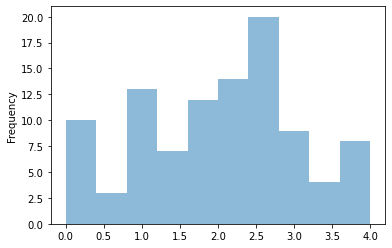

In [573]:
# inspect distribution for control group
q2_cg['uncertainty_score'] = (q2_cg[['US01_01', 'US01_02', 'US01_03', 'US01_04']].sum(axis=1))/4
q2_cg['uncertainty_score'].plot.hist(bins=10, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

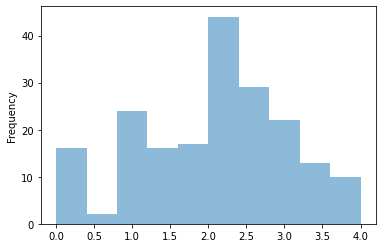

In [574]:
# inspect distribution for experimental group
q2_eg['uncertainty_score'] = (q2_eg[['US01_01', 'US01_02', 'US01_03', 'US01_04']].sum(axis=1))/4
q2_eg['uncertainty_score'].plot.hist(bins=10, alpha=0.5)

In [575]:
# replace agree / disagree values in the q1
for column in q2_eg[q2_eg.columns.intersection(uncertainty_items)].columns:
    q2_eg[column] = q2_eg[column].map({1: "stimme nicht zu", 2: "stimme eher nicht zu", 3: "stimme eher zu", 4: "stimme zu", 0: "Keine Angabe"})
q2_eg.head()

,IS01_01,IS01_02,IS01_03,IS01_04,IS01_05,IS01_06,IS01_07,IS01_08,IS01_09,IS01_10,IS02_01,IS03_01,IO01,IO02,IO03,IO04,IO05,IO06,RW01_01,RW02_01,RW03_01,RW03_02,RW03_03,RW04_01,RW04_02,RW04_03,RW05_01,RW05_02,RW05_03,H101,H102_01,H102_02,H102_03,H102_04,H102_05,H102_06,H102_07,H103,H104_01,H104_02,H104_03,H105_01,H106_01,H201_01,H201_02,H202_01,H202_02,H202_03,CL01_01,CL01_02,CL01_03,CL01_04,CL01_05,CL01_06,CA01_01,CA01_02,CA01_03,CA01_04,CA01_05,CA01_06,CS01_01,CS01_02,CS01_03,CS01_04,CS01_05,CS01_06,US01_01,US01_02,US01_03,US01_04,uncertainty_score
2,3,4,2,2,2,5,3,3,3,2,NaN,NaN,2,2,1,1,2,2,2,2,2,2,1,3,3,2,2,3,2,Nein,1,1,4,4,4,1,3,Keine Angabe,NaN,NaN,NaN,NaN,NaN,3,3,3,3,2,3,2,2,3,3,3,3,3,2,3,2,3,3,3,2,2,2,3,stimme eher zu,stimme eher zu,stimme eher nicht zu,stimme eher nicht zu,2.50
3,4,4,3,4,4,3,3,4,4,4,man sollte messen,nichts,2,2,1,1,2,2,NaN,3,2,2,2,3,3,3,3,3,3,Nein,3,-1,3,2,3,-1,-1,Keine Angabe,NaN,NaN,NaN,NaN,NaN,4,3,4,3,3,2,3,2,3,2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,stimme eher nicht zu,stimme eher nicht zu,stimme eher nicht zu,stimme eher nicht zu,2.00
4,5,5,5,5,5,5,5,5,5,5,NaN,NaN,-1,-1,-1,-1,-1,-1,NaN,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Nein,-1,-1,-1,-1,-1,-1,-1,Nein,-1,-1,-1,NaN,NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,0.00
5,5,4,4,4,5,2,4,4,4,4,NaN,NaN,2,2,1,1,2,2,NaN,2,1,2,2,3,4,-1,3,4,4,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,4,3,3,3,2,3,2,3,2,2,3,2,3,2,1,2,3,2,3,3,2,3,3,stimme eher zu,stimme eher zu,stimme zu,stimme eher zu,3.25
6,4,3,3,3,4,3,3,4,4,3,NaN,NaN,2,2,-1,1,2,-1,2,2,-1,-1,-1,3,4,3,-1,-1,-1,Nein,-1,-1,-1,-1,3,-1,-1,Ja,NaN,NaN,NaN,NaN,NaN,3,3,3,3,-1,2,3,2,3,2,3,2,3,2,3,2,3,-1,-1,-1,-1,-1,-1,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher zu,3.00


In [576]:
# replace agree / disagree values in the q1
for column in q2_cg[q2_cg.columns.intersection(uncertainty_items)].columns:
    q2_cg[column] = q2_cg[column].map({1: "stimme nicht zu", 2: "stimme eher nicht zu", 3: "stimme eher zu", 4: "stimme zu", 0: "Keine Angabe"})
q2_cg.head()

,IS01_01,IS01_02,IS01_03,IS01_04,IS01_05,IS01_06,IS01_07,IS01_08,IS01_09,IS01_10,IS02_01,IS03_01,IO01,IO02,IO03,IO04,IO05,IO06,RW01_01,RW02_01,RW03_01,RW03_02,RW03_03,RW04_01,RW04_02,RW04_03,RW05_01,RW05_02,RW05_03,H101,H102_01,H102_02,H102_03,H102_04,H102_05,H102_06,H102_07,H103,H104_01,H104_02,H104_03,H105_01,H106_01,H201_01,H201_02,H202_01,H202_02,H202_03,CL01_01,CL01_02,CL01_03,CL01_04,CL01_05,CL01_06,CA01_01,CA01_02,CA01_03,CA01_04,CA01_05,CA01_06,CS01_01,CS01_02,CS01_03,CS01_04,CS01_05,CS01_06,US01_01,US01_02,US01_03,US01_04,uncertainty_score
1,4,4,3,3,3,2,3,3,3,3,sehr übersichtlich,habe das gefühl das dies ein weiterer versuch ...,-1,2,1,1,2,1,1,2,2,2,2,3,4,3,2,2,2,Nein,-1,1,-1,-1,4,1,4,Keine Angabe,NaN,NaN,NaN,NaN,NaN,4,2,3,3,-1,1,4,-1,4,1,3,1,4,3,3,1,-1,4,-1,-1,-1,-1,-1,stimme nicht zu,Keine Angabe,Keine Angabe,Keine Angabe,0.25
2,5,5,5,5,5,5,5,5,5,5,Sachlich und informativ,nichts,2,2,1,2,2,2,4,4,2,2,1,4,4,4,3,2,2,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,4,4,4,4,4,1,4,2,4,1,4,1,4,1,4,1,4,3,4,2,4,1,3,stimme eher nicht zu,stimme nicht zu,stimme nicht zu,stimme eher nicht zu,1.50
3,5,5,4,4,5,2,3,4,4,4,übersichtlich,viel Text,2,2,1,1,2,2,NaN,2,1,2,1,3,3,3,-1,2,2,Nein,-1,2,-1,3,3,-1,2,Ja,NaN,NaN,NaN,NaN,NaN,3,3,3,3,3,2,3,2,3,1,-1,2,3,-1,-1,3,3,2,3,-1,-1,3,3,stimme eher zu,stimme eher zu,stimme eher nicht zu,stimme eher nicht zu,2.50
4,4,5,4,5,5,2,5,5,4,3,NaN,NaN,2,2,1,2,2,2,NaN,2,-1,2,1,4,3,4,-1,-1,-1,Nein,2,2,4,4,4,4,4,Nein,4,4,4,NaN,NaN,3,4,-1,-1,-1,-1,3,2,3,2,4,2,4,3,3,3,4,-1,-1,-1,-1,-1,-1,stimme eher zu,stimme zu,stimme zu,stimme zu,3.75
5,4,4,4,4,4,2,4,4,4,3,gut zu verstehender text,nichts,1,-1,1,-1,1,-1,NaN,3,3,2,2,3,3,3,3,3,2,Nein,2,2,3,3,3,3,2,Nein,3,3,3,NaN,NaN,2,2,2,2,2,2,3,3,2,2,3,3,3,2,3,2,3,3,2,3,3,3,3,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher zu,2.75


## Perceived efficacy score

In [577]:
# segment perceived efficacy by measure
airing_positive = ['CL01_02', 'CL01_04', 'CL01_06']
airing_negative = ['CL01_01', 'CL01_03', 'CL01_05']

sealing_positive = ['CA01_02', 'CA01_04', 'CA01_06']
sealing_negative = ['CA01_01', 'CA01_03', 'CA01_05']

building_renovation_positive = ['CS01_02', 'CS01_04', 'CS01_06']
building_renovation_negative = ['CS01_01', 'CS01_03', 'CS01_05']

response_efficacy_positive = ['CL01_02', 'CA01_02', 'CS01_02']
response_efficacy_negative = ['CL01_01', 'CA01_01', 'CS01_01']

response_cost_positive = ['CL01_04', 'CA01_04', 'CS01_04']
response_cost_negative = ['CL01_03', 'CA01_03', 'CS01_03']

self_efficacy_positive = ['CL01_06', 'CA01_06', 'CS01_06']
self_efficacy_negative = ['CL01_05', 'CA01_05', 'CS01_05']

all_positive = airing_positive + sealing_positive + building_renovation_positive
all_negative = airing_negative + sealing_negative + building_renovation_negative

### Airing

In [578]:
# replace in q2
for column in q2_cg[q2_cg.columns.intersection(airing_positive)].columns:
    q2_cg[column] = q2_cg[column].map({"1": 1, "2": 2, "3": 3, "4": 4,  "-9": 0, "-1": 0})
q2_cg.head()

,IS01_01,IS01_02,IS01_03,IS01_04,IS01_05,IS01_06,IS01_07,IS01_08,IS01_09,IS01_10,IS02_01,IS03_01,IO01,IO02,IO03,IO04,IO05,IO06,RW01_01,RW02_01,RW03_01,RW03_02,RW03_03,RW04_01,RW04_02,RW04_03,RW05_01,RW05_02,RW05_03,H101,H102_01,H102_02,H102_03,H102_04,H102_05,H102_06,H102_07,H103,H104_01,H104_02,H104_03,H105_01,H106_01,H201_01,H201_02,H202_01,H202_02,H202_03,CL01_01,CL01_02,CL01_03,CL01_04,CL01_05,CL01_06,CA01_01,CA01_02,CA01_03,CA01_04,CA01_05,CA01_06,CS01_01,CS01_02,CS01_03,CS01_04,CS01_05,CS01_06,US01_01,US01_02,US01_03,US01_04,uncertainty_score
1,4,4,3,3,3,2,3,3,3,3,sehr übersichtlich,habe das gefühl das dies ein weiterer versuch ...,-1,2,1,1,2,1,1,2,2,2,2,3,4,3,2,2,2,Nein,-1,1,-1,-1,4,1,4,Keine Angabe,NaN,NaN,NaN,NaN,NaN,4,2,3,3,-1,1,4,-1,4,1,3,1,4,3,3,1,-1,4,-1,-1,-1,-1,-1,stimme nicht zu,Keine Angabe,Keine Angabe,Keine Angabe,0.25
2,5,5,5,5,5,5,5,5,5,5,Sachlich und informativ,nichts,2,2,1,2,2,2,4,4,2,2,1,4,4,4,3,2,2,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,4,4,4,4,4,1,4,2,4,1,4,1,4,1,4,1,4,3,4,2,4,1,3,stimme eher nicht zu,stimme nicht zu,stimme nicht zu,stimme eher nicht zu,1.50
3,5,5,4,4,5,2,3,4,4,4,übersichtlich,viel Text,2,2,1,1,2,2,NaN,2,1,2,1,3,3,3,-1,2,2,Nein,-1,2,-1,3,3,-1,2,Ja,NaN,NaN,NaN,NaN,NaN,3,3,3,3,3,2,3,2,3,1,0,2,3,-1,-1,3,3,2,3,-1,-1,3,3,stimme eher zu,stimme eher zu,stimme eher nicht zu,stimme eher nicht zu,2.50
4,4,5,4,5,5,2,5,5,4,3,NaN,NaN,2,2,1,2,2,2,NaN,2,-1,2,1,4,3,4,-1,-1,-1,Nein,2,2,4,4,4,4,4,Nein,4,4,4,NaN,NaN,3,4,-1,-1,-1,-1,3,2,3,2,4,2,4,3,3,3,4,-1,-1,-1,-1,-1,-1,stimme eher zu,stimme zu,stimme zu,stimme zu,3.75
5,4,4,4,4,4,2,4,4,4,3,gut zu verstehender text,nichts,1,-1,1,-1,1,-1,NaN,3,3,2,2,3,3,3,3,3,2,Nein,2,2,3,3,3,3,2,Nein,3,3,3,NaN,NaN,2,2,2,2,2,2,3,3,2,2,3,3,3,2,3,2,3,3,2,3,3,3,3,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher zu,2.75


In [579]:
# replace in q2
for column in q2_cg[q2_cg.columns.intersection(airing_positive)].columns:
    q2_eg[column] = q2_eg[column].map({"1": 1, "2": 2, "3": 3, "4": 4,  "-9": 0, "-1": 0})
q2_eg.head()

,IS01_01,IS01_02,IS01_03,IS01_04,IS01_05,IS01_06,IS01_07,IS01_08,IS01_09,IS01_10,IS02_01,IS03_01,IO01,IO02,IO03,IO04,IO05,IO06,RW01_01,RW02_01,RW03_01,RW03_02,RW03_03,RW04_01,RW04_02,RW04_03,RW05_01,RW05_02,RW05_03,H101,H102_01,H102_02,H102_03,H102_04,H102_05,H102_06,H102_07,H103,H104_01,H104_02,H104_03,H105_01,H106_01,H201_01,H201_02,H202_01,H202_02,H202_03,CL01_01,CL01_02,CL01_03,CL01_04,CL01_05,CL01_06,CA01_01,CA01_02,CA01_03,CA01_04,CA01_05,CA01_06,CS01_01,CS01_02,CS01_03,CS01_04,CS01_05,CS01_06,US01_01,US01_02,US01_03,US01_04,uncertainty_score
2,3,4,2,2,2,5,3,3,3,2,NaN,NaN,2,2,1,1,2,2,2,2,2,2,1,3,3,2,2,3,2,Nein,1,1,4,4,4,1,3,Keine Angabe,NaN,NaN,NaN,NaN,NaN,3,3,3,3,2,3,2,2,3,3,3,3,3,2,3,2,3,3,3,2,2,2,3,stimme eher zu,stimme eher zu,stimme eher nicht zu,stimme eher nicht zu,2.50
3,4,4,3,4,4,3,3,4,4,4,man sollte messen,nichts,2,2,1,1,2,2,NaN,3,2,2,2,3,3,3,3,3,3,Nein,3,-1,3,2,3,-1,-1,Keine Angabe,NaN,NaN,NaN,NaN,NaN,4,3,4,3,3,2,3,2,3,2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,stimme eher nicht zu,stimme eher nicht zu,stimme eher nicht zu,stimme eher nicht zu,2.00
4,5,5,5,5,5,5,5,5,5,5,NaN,NaN,-1,-1,-1,-1,-1,-1,NaN,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Nein,-1,-1,-1,-1,-1,-1,-1,Nein,-1,-1,-1,NaN,NaN,-1,-1,-1,-1,-1,-1,0,-1,0,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,0.00
5,5,4,4,4,5,2,4,4,4,4,NaN,NaN,2,2,1,1,2,2,NaN,2,1,2,2,3,4,-1,3,4,4,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,4,3,3,3,2,3,2,3,2,2,3,2,3,2,1,2,3,2,3,3,2,3,3,stimme eher zu,stimme eher zu,stimme zu,stimme eher zu,3.25
6,4,3,3,3,4,3,3,4,4,3,NaN,NaN,2,2,-1,1,2,-1,2,2,-1,-1,-1,3,4,3,-1,-1,-1,Nein,-1,-1,-1,-1,3,-1,-1,Ja,NaN,NaN,NaN,NaN,NaN,3,3,3,3,-1,2,3,2,3,2,3,2,3,2,3,2,3,-1,-1,-1,-1,-1,-1,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher zu,3.00


In [580]:
# replace in q2
for column in q2_cg[q2_cg.columns.intersection(airing_negative)].columns:
    q2_cg[column] = q2_cg[column].map({"1": 4, "2": 3, "3": 2, "4": 1,  "-9": 0, "-1": 0})
q2_cg.head()

,IS01_01,IS01_02,IS01_03,IS01_04,IS01_05,IS01_06,IS01_07,IS01_08,IS01_09,IS01_10,IS02_01,IS03_01,IO01,IO02,IO03,IO04,IO05,IO06,RW01_01,RW02_01,RW03_01,RW03_02,RW03_03,RW04_01,RW04_02,RW04_03,RW05_01,RW05_02,RW05_03,H101,H102_01,H102_02,H102_03,H102_04,H102_05,H102_06,H102_07,H103,H104_01,H104_02,H104_03,H105_01,H106_01,H201_01,H201_02,H202_01,H202_02,H202_03,CL01_01,CL01_02,CL01_03,CL01_04,CL01_05,CL01_06,CA01_01,CA01_02,CA01_03,CA01_04,CA01_05,CA01_06,CS01_01,CS01_02,CS01_03,CS01_04,CS01_05,CS01_06,US01_01,US01_02,US01_03,US01_04,uncertainty_score
1,4,4,3,3,3,2,3,3,3,3,sehr übersichtlich,habe das gefühl das dies ein weiterer versuch ...,-1,2,1,1,2,1,1,2,2,2,2,3,4,3,2,2,2,Nein,-1,1,-1,-1,4,1,4,Keine Angabe,NaN,NaN,NaN,NaN,NaN,4,2,3,3,-1,4,4,0,4,4,3,1,4,3,3,1,-1,4,-1,-1,-1,-1,-1,stimme nicht zu,Keine Angabe,Keine Angabe,Keine Angabe,0.25
2,5,5,5,5,5,5,5,5,5,5,Sachlich und informativ,nichts,2,2,1,2,2,2,4,4,2,2,1,4,4,4,3,2,2,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,4,4,4,4,4,4,4,3,4,4,4,1,4,1,4,1,4,3,4,2,4,1,3,stimme eher nicht zu,stimme nicht zu,stimme nicht zu,stimme eher nicht zu,1.50
3,5,5,4,4,5,2,3,4,4,4,übersichtlich,viel Text,2,2,1,1,2,2,NaN,2,1,2,1,3,3,3,-1,2,2,Nein,-1,2,-1,3,3,-1,2,Ja,NaN,NaN,NaN,NaN,NaN,3,3,3,3,3,3,3,3,3,4,0,2,3,-1,-1,3,3,2,3,-1,-1,3,3,stimme eher zu,stimme eher zu,stimme eher nicht zu,stimme eher nicht zu,2.50
4,4,5,4,5,5,2,5,5,4,3,NaN,NaN,2,2,1,2,2,2,NaN,2,-1,2,1,4,3,4,-1,-1,-1,Nein,2,2,4,4,4,4,4,Nein,4,4,4,NaN,NaN,3,4,-1,-1,-1,0,3,3,3,3,4,2,4,3,3,3,4,-1,-1,-1,-1,-1,-1,stimme eher zu,stimme zu,stimme zu,stimme zu,3.75
5,4,4,4,4,4,2,4,4,4,3,gut zu verstehender text,nichts,1,-1,1,-1,1,-1,NaN,3,3,2,2,3,3,3,3,3,2,Nein,2,2,3,3,3,3,2,Nein,3,3,3,NaN,NaN,2,2,2,2,2,3,3,2,2,3,3,3,3,2,3,2,3,3,2,3,3,3,3,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher zu,2.75


In [581]:
# replace in q2
for column in q2_cg[q2_cg.columns.intersection(airing_negative)].columns:
    q2_eg[column] = q2_eg[column].map({"1": 4, "2": 3, "3": 2, "4": 1,  "-9": 0, "-1": 0})
q2_eg.head()

,IS01_01,IS01_02,IS01_03,IS01_04,IS01_05,IS01_06,IS01_07,IS01_08,IS01_09,IS01_10,IS02_01,IS03_01,IO01,IO02,IO03,IO04,IO05,IO06,RW01_01,RW02_01,RW03_01,RW03_02,RW03_03,RW04_01,RW04_02,RW04_03,RW05_01,RW05_02,RW05_03,H101,H102_01,H102_02,H102_03,H102_04,H102_05,H102_06,H102_07,H103,H104_01,H104_02,H104_03,H105_01,H106_01,H201_01,H201_02,H202_01,H202_02,H202_03,CL01_01,CL01_02,CL01_03,CL01_04,CL01_05,CL01_06,CA01_01,CA01_02,CA01_03,CA01_04,CA01_05,CA01_06,CS01_01,CS01_02,CS01_03,CS01_04,CS01_05,CS01_06,US01_01,US01_02,US01_03,US01_04,uncertainty_score
2,3,4,2,2,2,5,3,3,3,2,NaN,NaN,2,2,1,1,2,2,2,2,2,2,1,3,3,2,2,3,2,Nein,1,1,4,4,4,1,3,Keine Angabe,NaN,NaN,NaN,NaN,NaN,3,3,3,3,2,2,2,3,3,2,3,3,3,2,3,2,3,3,3,2,2,2,3,stimme eher zu,stimme eher zu,stimme eher nicht zu,stimme eher nicht zu,2.50
3,4,4,3,4,4,3,3,4,4,4,man sollte messen,nichts,2,2,1,1,2,2,NaN,3,2,2,2,3,3,3,3,3,3,Nein,3,-1,3,2,3,-1,-1,Keine Angabe,NaN,NaN,NaN,NaN,NaN,4,3,4,3,3,3,3,3,3,3,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,stimme eher nicht zu,stimme eher nicht zu,stimme eher nicht zu,stimme eher nicht zu,2.00
4,5,5,5,5,5,5,5,5,5,5,NaN,NaN,-1,-1,-1,-1,-1,-1,NaN,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Nein,-1,-1,-1,-1,-1,-1,-1,Nein,-1,-1,-1,NaN,NaN,-1,-1,-1,-1,-1,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,0.00
5,5,4,4,4,5,2,4,4,4,4,NaN,NaN,2,2,1,1,2,2,NaN,2,1,2,2,3,4,-1,3,4,4,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,4,3,3,3,2,2,2,2,2,3,3,2,3,2,1,2,3,2,3,3,2,3,3,stimme eher zu,stimme eher zu,stimme zu,stimme eher zu,3.25
6,4,3,3,3,4,3,3,4,4,3,NaN,NaN,2,2,-1,1,2,-1,2,2,-1,-1,-1,3,4,3,-1,-1,-1,Nein,-1,-1,-1,-1,3,-1,-1,Ja,NaN,NaN,NaN,NaN,NaN,3,3,3,3,-1,3,3,3,3,3,3,2,3,2,3,2,3,-1,-1,-1,-1,-1,-1,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher zu,3.00


### Sealing

In [582]:
# replace in q2
for column in q2_cg[q2_cg.columns.intersection(sealing_positive)].columns:
    q2_cg[column] = q2_cg[column].map({"1": 1, "2": 2, "3": 3, "4": 4,  "-9": 0, "-1": 0})
q2_cg.head()

,IS01_01,IS01_02,IS01_03,IS01_04,IS01_05,IS01_06,IS01_07,IS01_08,IS01_09,IS01_10,IS02_01,IS03_01,IO01,IO02,IO03,IO04,IO05,IO06,RW01_01,RW02_01,RW03_01,RW03_02,RW03_03,RW04_01,RW04_02,RW04_03,RW05_01,RW05_02,RW05_03,H101,H102_01,H102_02,H102_03,H102_04,H102_05,H102_06,H102_07,H103,H104_01,H104_02,H104_03,H105_01,H106_01,H201_01,H201_02,H202_01,H202_02,H202_03,CL01_01,CL01_02,CL01_03,CL01_04,CL01_05,CL01_06,CA01_01,CA01_02,CA01_03,CA01_04,CA01_05,CA01_06,CS01_01,CS01_02,CS01_03,CS01_04,CS01_05,CS01_06,US01_01,US01_02,US01_03,US01_04,uncertainty_score
1,4,4,3,3,3,2,3,3,3,3,sehr übersichtlich,habe das gefühl das dies ein weiterer versuch ...,-1,2,1,1,2,1,1,2,2,2,2,3,4,3,2,2,2,Nein,-1,1,-1,-1,4,1,4,Keine Angabe,NaN,NaN,NaN,NaN,NaN,4,2,3,3,-1,4,4,0,4,4,3,1,4,3,3,1,0,4,-1,-1,-1,-1,-1,stimme nicht zu,Keine Angabe,Keine Angabe,Keine Angabe,0.25
2,5,5,5,5,5,5,5,5,5,5,Sachlich und informativ,nichts,2,2,1,2,2,2,4,4,2,2,1,4,4,4,3,2,2,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,4,4,4,4,4,4,4,3,4,4,4,1,4,1,4,1,4,3,4,2,4,1,3,stimme eher nicht zu,stimme nicht zu,stimme nicht zu,stimme eher nicht zu,1.50
3,5,5,4,4,5,2,3,4,4,4,übersichtlich,viel Text,2,2,1,1,2,2,NaN,2,1,2,1,3,3,3,-1,2,2,Nein,-1,2,-1,3,3,-1,2,Ja,NaN,NaN,NaN,NaN,NaN,3,3,3,3,3,3,3,3,3,4,0,2,3,-1,0,3,3,2,3,-1,-1,3,3,stimme eher zu,stimme eher zu,stimme eher nicht zu,stimme eher nicht zu,2.50
4,4,5,4,5,5,2,5,5,4,3,NaN,NaN,2,2,1,2,2,2,NaN,2,-1,2,1,4,3,4,-1,-1,-1,Nein,2,2,4,4,4,4,4,Nein,4,4,4,NaN,NaN,3,4,-1,-1,-1,0,3,3,3,3,4,2,4,3,3,3,4,-1,-1,-1,-1,-1,-1,stimme eher zu,stimme zu,stimme zu,stimme zu,3.75
5,4,4,4,4,4,2,4,4,4,3,gut zu verstehender text,nichts,1,-1,1,-1,1,-1,NaN,3,3,2,2,3,3,3,3,3,2,Nein,2,2,3,3,3,3,2,Nein,3,3,3,NaN,NaN,2,2,2,2,2,3,3,2,2,3,3,3,3,2,3,2,3,3,2,3,3,3,3,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher zu,2.75


In [583]:
# replace in q2
for column in q2_cg[q2_cg.columns.intersection(sealing_positive)].columns:
    q2_eg[column] = q2_eg[column].map({"1": 1, "2": 2, "3": 3, "4": 4,  "-9": 0, "-1": 0})
q2_eg.head()

,IS01_01,IS01_02,IS01_03,IS01_04,IS01_05,IS01_06,IS01_07,IS01_08,IS01_09,IS01_10,IS02_01,IS03_01,IO01,IO02,IO03,IO04,IO05,IO06,RW01_01,RW02_01,RW03_01,RW03_02,RW03_03,RW04_01,RW04_02,RW04_03,RW05_01,RW05_02,RW05_03,H101,H102_01,H102_02,H102_03,H102_04,H102_05,H102_06,H102_07,H103,H104_01,H104_02,H104_03,H105_01,H106_01,H201_01,H201_02,H202_01,H202_02,H202_03,CL01_01,CL01_02,CL01_03,CL01_04,CL01_05,CL01_06,CA01_01,CA01_02,CA01_03,CA01_04,CA01_05,CA01_06,CS01_01,CS01_02,CS01_03,CS01_04,CS01_05,CS01_06,US01_01,US01_02,US01_03,US01_04,uncertainty_score
2,3,4,2,2,2,5,3,3,3,2,NaN,NaN,2,2,1,1,2,2,2,2,2,2,1,3,3,2,2,3,2,Nein,1,1,4,4,4,1,3,Keine Angabe,NaN,NaN,NaN,NaN,NaN,3,3,3,3,2,2,2,3,3,2,3,3,3,2,3,2,3,3,3,2,2,2,3,stimme eher zu,stimme eher zu,stimme eher nicht zu,stimme eher nicht zu,2.50
3,4,4,3,4,4,3,3,4,4,4,man sollte messen,nichts,2,2,1,1,2,2,NaN,3,2,2,2,3,3,3,3,3,3,Nein,3,-1,3,2,3,-1,-1,Keine Angabe,NaN,NaN,NaN,NaN,NaN,4,3,4,3,3,3,3,3,3,3,3,-1,0,-1,0,-1,0,-1,-1,-1,-1,-1,-1,stimme eher nicht zu,stimme eher nicht zu,stimme eher nicht zu,stimme eher nicht zu,2.00
4,5,5,5,5,5,5,5,5,5,5,NaN,NaN,-1,-1,-1,-1,-1,-1,NaN,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Nein,-1,-1,-1,-1,-1,-1,-1,Nein,-1,-1,-1,NaN,NaN,-1,-1,-1,-1,-1,0,0,0,0,0,0,-1,0,-1,0,-1,0,-1,-1,-1,-1,-1,-1,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,0.00
5,5,4,4,4,5,2,4,4,4,4,NaN,NaN,2,2,1,1,2,2,NaN,2,1,2,2,3,4,-1,3,4,4,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,4,3,3,3,2,2,2,2,2,3,3,2,3,2,1,2,3,2,3,3,2,3,3,stimme eher zu,stimme eher zu,stimme zu,stimme eher zu,3.25
6,4,3,3,3,4,3,3,4,4,3,NaN,NaN,2,2,-1,1,2,-1,2,2,-1,-1,-1,3,4,3,-1,-1,-1,Nein,-1,-1,-1,-1,3,-1,-1,Ja,NaN,NaN,NaN,NaN,NaN,3,3,3,3,-1,3,3,3,3,3,3,2,3,2,3,2,3,-1,-1,-1,-1,-1,-1,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher zu,3.00


In [584]:
# replace in q2
for column in q2_cg[q2_cg.columns.intersection(sealing_negative)].columns:
    q2_cg[column] = q2_cg[column].map({"1": 4, "2": 3, "3": 2, "4": 1,  "-9": 0, "-1": 0})
q2_cg.head()

,IS01_01,IS01_02,IS01_03,IS01_04,IS01_05,IS01_06,IS01_07,IS01_08,IS01_09,IS01_10,IS02_01,IS03_01,IO01,IO02,IO03,IO04,IO05,IO06,RW01_01,RW02_01,RW03_01,RW03_02,RW03_03,RW04_01,RW04_02,RW04_03,RW05_01,RW05_02,RW05_03,H101,H102_01,H102_02,H102_03,H102_04,H102_05,H102_06,H102_07,H103,H104_01,H104_02,H104_03,H105_01,H106_01,H201_01,H201_02,H202_01,H202_02,H202_03,CL01_01,CL01_02,CL01_03,CL01_04,CL01_05,CL01_06,CA01_01,CA01_02,CA01_03,CA01_04,CA01_05,CA01_06,CS01_01,CS01_02,CS01_03,CS01_04,CS01_05,CS01_06,US01_01,US01_02,US01_03,US01_04,uncertainty_score
1,4,4,3,3,3,2,3,3,3,3,sehr übersichtlich,habe das gefühl das dies ein weiterer versuch ...,-1,2,1,1,2,1,1,2,2,2,2,3,4,3,2,2,2,Nein,-1,1,-1,-1,4,1,4,Keine Angabe,NaN,NaN,NaN,NaN,NaN,4,2,3,3,-1,4,4,0,4,4,3,4,4,2,3,4,0,4,-1,-1,-1,-1,-1,stimme nicht zu,Keine Angabe,Keine Angabe,Keine Angabe,0.25
2,5,5,5,5,5,5,5,5,5,5,Sachlich und informativ,nichts,2,2,1,2,2,2,4,4,2,2,1,4,4,4,3,2,2,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,4,4,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4,3,4,2,4,1,3,stimme eher nicht zu,stimme nicht zu,stimme nicht zu,stimme eher nicht zu,1.50
3,5,5,4,4,5,2,3,4,4,4,übersichtlich,viel Text,2,2,1,1,2,2,NaN,2,1,2,1,3,3,3,-1,2,2,Nein,-1,2,-1,3,3,-1,2,Ja,NaN,NaN,NaN,NaN,NaN,3,3,3,3,3,3,3,3,3,4,0,3,3,0,0,2,3,2,3,-1,-1,3,3,stimme eher zu,stimme eher zu,stimme eher nicht zu,stimme eher nicht zu,2.50
4,4,5,4,5,5,2,5,5,4,3,NaN,NaN,2,2,1,2,2,2,NaN,2,-1,2,1,4,3,4,-1,-1,-1,Nein,2,2,4,4,4,4,4,Nein,4,4,4,NaN,NaN,3,4,-1,-1,-1,0,3,3,3,3,4,3,4,2,3,2,4,-1,-1,-1,-1,-1,-1,stimme eher zu,stimme zu,stimme zu,stimme zu,3.75
5,4,4,4,4,4,2,4,4,4,3,gut zu verstehender text,nichts,1,-1,1,-1,1,-1,NaN,3,3,2,2,3,3,3,3,3,2,Nein,2,2,3,3,3,3,2,Nein,3,3,3,NaN,NaN,2,2,2,2,2,3,3,2,2,3,3,2,3,3,3,3,3,3,2,3,3,3,3,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher zu,2.75


In [585]:
# replace in q2
for column in q2_cg[q2_cg.columns.intersection(sealing_negative)].columns:
    q2_eg[column] = q2_eg[column].map({"1": 4, "2": 3, "3": 2, "4": 1,  "-9": 0, "-1": 0})
q2_eg.head()

,IS01_01,IS01_02,IS01_03,IS01_04,IS01_05,IS01_06,IS01_07,IS01_08,IS01_09,IS01_10,IS02_01,IS03_01,IO01,IO02,IO03,IO04,IO05,IO06,RW01_01,RW02_01,RW03_01,RW03_02,RW03_03,RW04_01,RW04_02,RW04_03,RW05_01,RW05_02,RW05_03,H101,H102_01,H102_02,H102_03,H102_04,H102_05,H102_06,H102_07,H103,H104_01,H104_02,H104_03,H105_01,H106_01,H201_01,H201_02,H202_01,H202_02,H202_03,CL01_01,CL01_02,CL01_03,CL01_04,CL01_05,CL01_06,CA01_01,CA01_02,CA01_03,CA01_04,CA01_05,CA01_06,CS01_01,CS01_02,CS01_03,CS01_04,CS01_05,CS01_06,US01_01,US01_02,US01_03,US01_04,uncertainty_score
2,3,4,2,2,2,5,3,3,3,2,NaN,NaN,2,2,1,1,2,2,2,2,2,2,1,3,3,2,2,3,2,Nein,1,1,4,4,4,1,3,Keine Angabe,NaN,NaN,NaN,NaN,NaN,3,3,3,3,2,2,2,3,3,2,3,2,3,3,3,3,3,3,3,2,2,2,3,stimme eher zu,stimme eher zu,stimme eher nicht zu,stimme eher nicht zu,2.50
3,4,4,3,4,4,3,3,4,4,4,man sollte messen,nichts,2,2,1,1,2,2,NaN,3,2,2,2,3,3,3,3,3,3,Nein,3,-1,3,2,3,-1,-1,Keine Angabe,NaN,NaN,NaN,NaN,NaN,4,3,4,3,3,3,3,3,3,3,3,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,stimme eher nicht zu,stimme eher nicht zu,stimme eher nicht zu,stimme eher nicht zu,2.00
4,5,5,5,5,5,5,5,5,5,5,NaN,NaN,-1,-1,-1,-1,-1,-1,NaN,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Nein,-1,-1,-1,-1,-1,-1,-1,Nein,-1,-1,-1,NaN,NaN,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,0.00
5,5,4,4,4,5,2,4,4,4,4,NaN,NaN,2,2,1,1,2,2,NaN,2,1,2,2,3,4,-1,3,4,4,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,4,3,3,3,2,2,2,2,2,3,3,3,3,3,1,3,3,2,3,3,2,3,3,stimme eher zu,stimme eher zu,stimme zu,stimme eher zu,3.25
6,4,3,3,3,4,3,3,4,4,3,NaN,NaN,2,2,-1,1,2,-1,2,2,-1,-1,-1,3,4,3,-1,-1,-1,Nein,-1,-1,-1,-1,3,-1,-1,Ja,NaN,NaN,NaN,NaN,NaN,3,3,3,3,-1,3,3,3,3,3,3,3,3,3,3,3,3,-1,-1,-1,-1,-1,-1,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher zu,3.00


### Building renovation

In [586]:
# replace in q2
for column in q2_cg[q2_cg.columns.intersection(building_renovation_positive)].columns:
    q2_cg[column] = q2_cg[column].map({"1": 1, "2": 2, "3": 3, "4": 4,  "-9": 0, "-1": 0})
q2_cg.head()

,IS01_01,IS01_02,IS01_03,IS01_04,IS01_05,IS01_06,IS01_07,IS01_08,IS01_09,IS01_10,IS02_01,IS03_01,IO01,IO02,IO03,IO04,IO05,IO06,RW01_01,RW02_01,RW03_01,RW03_02,RW03_03,RW04_01,RW04_02,RW04_03,RW05_01,RW05_02,RW05_03,H101,H102_01,H102_02,H102_03,H102_04,H102_05,H102_06,H102_07,H103,H104_01,H104_02,H104_03,H105_01,H106_01,H201_01,H201_02,H202_01,H202_02,H202_03,CL01_01,CL01_02,CL01_03,CL01_04,CL01_05,CL01_06,CA01_01,CA01_02,CA01_03,CA01_04,CA01_05,CA01_06,CS01_01,CS01_02,CS01_03,CS01_04,CS01_05,CS01_06,US01_01,US01_02,US01_03,US01_04,uncertainty_score
1,4,4,3,3,3,2,3,3,3,3,sehr übersichtlich,habe das gefühl das dies ein weiterer versuch ...,-1,2,1,1,2,1,1,2,2,2,2,3,4,3,2,2,2,Nein,-1,1,-1,-1,4,1,4,Keine Angabe,NaN,NaN,NaN,NaN,NaN,4,2,3,3,-1,4,4,0,4,4,3,4,4,2,3,4,0,4,0,-1,0,-1,0,stimme nicht zu,Keine Angabe,Keine Angabe,Keine Angabe,0.25
2,5,5,5,5,5,5,5,5,5,5,Sachlich und informativ,nichts,2,2,1,2,2,2,4,4,2,2,1,4,4,4,3,2,2,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,4,4,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4,3,4,2,4,1,3,stimme eher nicht zu,stimme nicht zu,stimme nicht zu,stimme eher nicht zu,1.50
3,5,5,4,4,5,2,3,4,4,4,übersichtlich,viel Text,2,2,1,1,2,2,NaN,2,1,2,1,3,3,3,-1,2,2,Nein,-1,2,-1,3,3,-1,2,Ja,NaN,NaN,NaN,NaN,NaN,3,3,3,3,3,3,3,3,3,4,0,3,3,0,0,2,3,2,3,-1,0,3,3,stimme eher zu,stimme eher zu,stimme eher nicht zu,stimme eher nicht zu,2.50
4,4,5,4,5,5,2,5,5,4,3,NaN,NaN,2,2,1,2,2,2,NaN,2,-1,2,1,4,3,4,-1,-1,-1,Nein,2,2,4,4,4,4,4,Nein,4,4,4,NaN,NaN,3,4,-1,-1,-1,0,3,3,3,3,4,3,4,2,3,2,4,-1,0,-1,0,-1,0,stimme eher zu,stimme zu,stimme zu,stimme zu,3.75
5,4,4,4,4,4,2,4,4,4,3,gut zu verstehender text,nichts,1,-1,1,-1,1,-1,NaN,3,3,2,2,3,3,3,3,3,2,Nein,2,2,3,3,3,3,2,Nein,3,3,3,NaN,NaN,2,2,2,2,2,3,3,2,2,3,3,2,3,3,3,3,3,3,2,3,3,3,3,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher zu,2.75


In [587]:
# replace in q2
for column in q2_cg[q2_cg.columns.intersection(building_renovation_positive)].columns:
    q2_eg[column] = q2_eg[column].map({"1": 1, "2": 2, "3": 3, "4": 4,  "-9": 0, "-1": 0})
q2_eg.head()

,IS01_01,IS01_02,IS01_03,IS01_04,IS01_05,IS01_06,IS01_07,IS01_08,IS01_09,IS01_10,IS02_01,IS03_01,IO01,IO02,IO03,IO04,IO05,IO06,RW01_01,RW02_01,RW03_01,RW03_02,RW03_03,RW04_01,RW04_02,RW04_03,RW05_01,RW05_02,RW05_03,H101,H102_01,H102_02,H102_03,H102_04,H102_05,H102_06,H102_07,H103,H104_01,H104_02,H104_03,H105_01,H106_01,H201_01,H201_02,H202_01,H202_02,H202_03,CL01_01,CL01_02,CL01_03,CL01_04,CL01_05,CL01_06,CA01_01,CA01_02,CA01_03,CA01_04,CA01_05,CA01_06,CS01_01,CS01_02,CS01_03,CS01_04,CS01_05,CS01_06,US01_01,US01_02,US01_03,US01_04,uncertainty_score
2,3,4,2,2,2,5,3,3,3,2,NaN,NaN,2,2,1,1,2,2,2,2,2,2,1,3,3,2,2,3,2,Nein,1,1,4,4,4,1,3,Keine Angabe,NaN,NaN,NaN,NaN,NaN,3,3,3,3,2,2,2,3,3,2,3,2,3,3,3,3,3,3,3,2,2,2,3,stimme eher zu,stimme eher zu,stimme eher nicht zu,stimme eher nicht zu,2.50
3,4,4,3,4,4,3,3,4,4,4,man sollte messen,nichts,2,2,1,1,2,2,NaN,3,2,2,2,3,3,3,3,3,3,Nein,3,-1,3,2,3,-1,-1,Keine Angabe,NaN,NaN,NaN,NaN,NaN,4,3,4,3,3,3,3,3,3,3,3,0,0,0,0,0,0,-1,0,-1,0,-1,0,stimme eher nicht zu,stimme eher nicht zu,stimme eher nicht zu,stimme eher nicht zu,2.00
4,5,5,5,5,5,5,5,5,5,5,NaN,NaN,-1,-1,-1,-1,-1,-1,NaN,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Nein,-1,-1,-1,-1,-1,-1,-1,Nein,-1,-1,-1,NaN,NaN,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,-1,0,-1,0,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,0.00
5,5,4,4,4,5,2,4,4,4,4,NaN,NaN,2,2,1,1,2,2,NaN,2,1,2,2,3,4,-1,3,4,4,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,4,3,3,3,2,2,2,2,2,3,3,3,3,3,1,3,3,2,3,3,2,3,3,stimme eher zu,stimme eher zu,stimme zu,stimme eher zu,3.25
6,4,3,3,3,4,3,3,4,4,3,NaN,NaN,2,2,-1,1,2,-1,2,2,-1,-1,-1,3,4,3,-1,-1,-1,Nein,-1,-1,-1,-1,3,-1,-1,Ja,NaN,NaN,NaN,NaN,NaN,3,3,3,3,-1,3,3,3,3,3,3,3,3,3,3,3,3,-1,0,-1,0,-1,0,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher zu,3.00


In [588]:
# replace in q2
for column in q2_cg[q2_cg.columns.intersection(building_renovation_negative)].columns:
    q2_cg[column] = q2_cg[column].map({"1": 4, "2": 3, "3": 2, "4": 1,  "-9": 0, "-1": 0})
q2_cg.head()

,IS01_01,IS01_02,IS01_03,IS01_04,IS01_05,IS01_06,IS01_07,IS01_08,IS01_09,IS01_10,IS02_01,IS03_01,IO01,IO02,IO03,IO04,IO05,IO06,RW01_01,RW02_01,RW03_01,RW03_02,RW03_03,RW04_01,RW04_02,RW04_03,RW05_01,RW05_02,RW05_03,H101,H102_01,H102_02,H102_03,H102_04,H102_05,H102_06,H102_07,H103,H104_01,H104_02,H104_03,H105_01,H106_01,H201_01,H201_02,H202_01,H202_02,H202_03,CL01_01,CL01_02,CL01_03,CL01_04,CL01_05,CL01_06,CA01_01,CA01_02,CA01_03,CA01_04,CA01_05,CA01_06,CS01_01,CS01_02,CS01_03,CS01_04,CS01_05,CS01_06,US01_01,US01_02,US01_03,US01_04,uncertainty_score
1,4,4,3,3,3,2,3,3,3,3,sehr übersichtlich,habe das gefühl das dies ein weiterer versuch ...,-1,2,1,1,2,1,1,2,2,2,2,3,4,3,2,2,2,Nein,-1,1,-1,-1,4,1,4,Keine Angabe,NaN,NaN,NaN,NaN,NaN,4,2,3,3,-1,4,4,0,4,4,3,4,4,2,3,4,0,1,0,0,0,0,0,stimme nicht zu,Keine Angabe,Keine Angabe,Keine Angabe,0.25
2,5,5,5,5,5,5,5,5,5,5,Sachlich und informativ,nichts,2,2,1,2,2,2,4,4,2,2,1,4,4,4,3,2,2,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,4,4,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4,2,4,3,4,4,3,stimme eher nicht zu,stimme nicht zu,stimme nicht zu,stimme eher nicht zu,1.50
3,5,5,4,4,5,2,3,4,4,4,übersichtlich,viel Text,2,2,1,1,2,2,NaN,2,1,2,1,3,3,3,-1,2,2,Nein,-1,2,-1,3,3,-1,2,Ja,NaN,NaN,NaN,NaN,NaN,3,3,3,3,3,3,3,3,3,4,0,3,3,0,0,2,3,3,3,0,0,2,3,stimme eher zu,stimme eher zu,stimme eher nicht zu,stimme eher nicht zu,2.50
4,4,5,4,5,5,2,5,5,4,3,NaN,NaN,2,2,1,2,2,2,NaN,2,-1,2,1,4,3,4,-1,-1,-1,Nein,2,2,4,4,4,4,4,Nein,4,4,4,NaN,NaN,3,4,-1,-1,-1,0,3,3,3,3,4,3,4,2,3,2,4,0,0,0,0,0,0,stimme eher zu,stimme zu,stimme zu,stimme zu,3.75
5,4,4,4,4,4,2,4,4,4,3,gut zu verstehender text,nichts,1,-1,1,-1,1,-1,NaN,3,3,2,2,3,3,3,3,3,2,Nein,2,2,3,3,3,3,2,Nein,3,3,3,NaN,NaN,2,2,2,2,2,3,3,2,2,3,3,2,3,3,3,3,3,2,2,2,3,2,3,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher zu,2.75


In [589]:
# replace in q2
for column in q2_cg[q2_cg.columns.intersection(building_renovation_negative)].columns:
    q2_eg[column] = q2_eg[column].map({"1": 4, "2": 3, "3": 2, "4": 1,  "-9": 0, "-1": 0})
q2_eg.head()

,IS01_01,IS01_02,IS01_03,IS01_04,IS01_05,IS01_06,IS01_07,IS01_08,IS01_09,IS01_10,IS02_01,IS03_01,IO01,IO02,IO03,IO04,IO05,IO06,RW01_01,RW02_01,RW03_01,RW03_02,RW03_03,RW04_01,RW04_02,RW04_03,RW05_01,RW05_02,RW05_03,H101,H102_01,H102_02,H102_03,H102_04,H102_05,H102_06,H102_07,H103,H104_01,H104_02,H104_03,H105_01,H106_01,H201_01,H201_02,H202_01,H202_02,H202_03,CL01_01,CL01_02,CL01_03,CL01_04,CL01_05,CL01_06,CA01_01,CA01_02,CA01_03,CA01_04,CA01_05,CA01_06,CS01_01,CS01_02,CS01_03,CS01_04,CS01_05,CS01_06,US01_01,US01_02,US01_03,US01_04,uncertainty_score
2,3,4,2,2,2,5,3,3,3,2,NaN,NaN,2,2,1,1,2,2,2,2,2,2,1,3,3,2,2,3,2,Nein,1,1,4,4,4,1,3,Keine Angabe,NaN,NaN,NaN,NaN,NaN,3,3,3,3,2,2,2,3,3,2,3,2,3,3,3,3,3,2,3,3,2,3,3,stimme eher zu,stimme eher zu,stimme eher nicht zu,stimme eher nicht zu,2.50
3,4,4,3,4,4,3,3,4,4,4,man sollte messen,nichts,2,2,1,1,2,2,NaN,3,2,2,2,3,3,3,3,3,3,Nein,3,-1,3,2,3,-1,-1,Keine Angabe,NaN,NaN,NaN,NaN,NaN,4,3,4,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,stimme eher nicht zu,stimme eher nicht zu,stimme eher nicht zu,stimme eher nicht zu,2.00
4,5,5,5,5,5,5,5,5,5,5,NaN,NaN,-1,-1,-1,-1,-1,-1,NaN,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Nein,-1,-1,-1,-1,-1,-1,-1,Nein,-1,-1,-1,NaN,NaN,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,0.00
5,5,4,4,4,5,2,4,4,4,4,NaN,NaN,2,2,1,1,2,2,NaN,2,1,2,2,3,4,-1,3,4,4,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,4,3,3,3,2,2,2,2,2,3,3,3,3,3,1,3,3,3,3,2,2,2,3,stimme eher zu,stimme eher zu,stimme zu,stimme eher zu,3.25
6,4,3,3,3,4,3,3,4,4,3,NaN,NaN,2,2,-1,1,2,-1,2,2,-1,-1,-1,3,4,3,-1,-1,-1,Nein,-1,-1,-1,-1,3,-1,-1,Ja,NaN,NaN,NaN,NaN,NaN,3,3,3,3,-1,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher zu,3.00


#### Calculate and plot the perceived efficacy score

<AxesSubplot:ylabel='Frequency'>

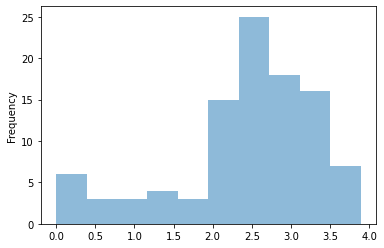

In [590]:
q2_cg['coping_score'] = (q2_cg[['CL01_02',
                                                              'CL01_04',
                                                              'CL01_06',
                                                              'CL01_01',
                                                              'CL01_03',
                                                              'CL01_05',
                                                              'CA01_02',
                                                              'CA01_04',
                                                              'CA01_06',
                                                              'CA01_01',
                                                              'CA01_03',
                                                              'CA01_05',
                                                              'CS01_02',
                                                              'CS01_04',
                                                              'CS01_06',
                                                              'CS01_01',
                                                              'CS01_03',
                                                              'CS01_05']].sum(axis=1))/18
q2_cg['coping_score'].plot.hist(bins=10, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

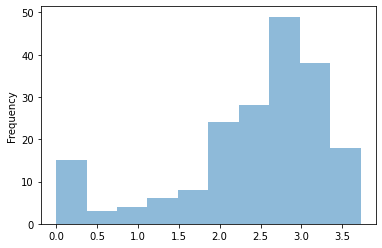

In [591]:
q2_eg['coping_score'] = (q2_eg[['CL01_02',
                                                              'CL01_04',
                                                              'CL01_06',
                                                              'CL01_01',
                                                              'CL01_03',
                                                              'CL01_05',
                                                              'CA01_02',
                                                              'CA01_04',
                                                              'CA01_06',
                                                              'CA01_01',
                                                              'CA01_03',
                                                              'CA01_05',
                                                              'CS01_02',
                                                              'CS01_04',
                                                              'CS01_06',
                                                              'CS01_01',
                                                              'CS01_03',
                                                              'CS01_05']].sum(axis=1))/18
q2_eg['coping_score'].plot.hist(bins=10, alpha=0.5)

In [592]:
# replace in q2
for column in q2_eg[q2_eg.columns.intersection(all_positive)].columns:
    q2_eg[column] = q2_eg[column].map({1: "stimme nicht zu", 2: "stimme eher nicht zu", 3: "stimme eher zu", 4: "stimme zu", 0: "Keine Angabe"})
q2_eg.head()

,IS01_01,IS01_02,IS01_03,IS01_04,IS01_05,IS01_06,IS01_07,IS01_08,IS01_09,IS01_10,IS02_01,IS03_01,IO01,IO02,IO03,IO04,IO05,IO06,RW01_01,RW02_01,RW03_01,RW03_02,RW03_03,RW04_01,RW04_02,RW04_03,RW05_01,RW05_02,RW05_03,H101,H102_01,H102_02,H102_03,H102_04,H102_05,H102_06,H102_07,H103,H104_01,H104_02,H104_03,H105_01,H106_01,H201_01,H201_02,H202_01,H202_02,H202_03,CL01_01,CL01_02,CL01_03,CL01_04,CL01_05,CL01_06,CA01_01,CA01_02,CA01_03,CA01_04,CA01_05,CA01_06,CS01_01,CS01_02,CS01_03,CS01_04,CS01_05,CS01_06,US01_01,US01_02,US01_03,US01_04,uncertainty_score,coping_score
2,3,4,2,2,2,5,3,3,3,2,NaN,NaN,2,2,1,1,2,2,2,2,2,2,1,3,3,2,2,3,2,Nein,1,1,4,4,4,1,3,Keine Angabe,NaN,NaN,NaN,NaN,NaN,3,3,3,3,2,2,stimme eher nicht zu,3,stimme eher zu,2,stimme eher zu,2,stimme eher zu,3,stimme eher zu,3,stimme eher zu,2,stimme eher zu,3,stimme eher nicht zu,3,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher nicht zu,stimme eher nicht zu,2.50,2.666667
3,4,4,3,4,4,3,3,4,4,4,man sollte messen,nichts,2,2,1,1,2,2,NaN,3,2,2,2,3,3,3,3,3,3,Nein,3,-1,3,2,3,-1,-1,Keine Angabe,NaN,NaN,NaN,NaN,NaN,4,3,4,3,3,3,stimme eher zu,3,stimme eher zu,3,stimme eher zu,0,Keine Angabe,0,Keine Angabe,0,Keine Angabe,0,Keine Angabe,0,Keine Angabe,0,Keine Angabe,stimme eher nicht zu,stimme eher nicht zu,stimme eher nicht zu,stimme eher nicht zu,2.00,1.000000
4,5,5,5,5,5,5,5,5,5,5,NaN,NaN,-1,-1,-1,-1,-1,-1,NaN,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Nein,-1,-1,-1,-1,-1,-1,-1,Nein,-1,-1,-1,NaN,NaN,-1,-1,-1,-1,-1,0,Keine Angabe,0,Keine Angabe,0,Keine Angabe,0,Keine Angabe,0,Keine Angabe,0,Keine Angabe,0,Keine Angabe,0,Keine Angabe,0,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,0.00,0.000000
5,5,4,4,4,5,2,4,4,4,4,NaN,NaN,2,2,1,1,2,2,NaN,2,1,2,2,3,4,-1,3,4,4,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,4,3,3,3,2,2,stimme eher nicht zu,2,stimme eher nicht zu,3,stimme eher zu,3,stimme eher zu,3,stimme nicht zu,3,stimme eher zu,3,stimme eher zu,2,stimme eher nicht zu,2,stimme eher zu,stimme eher zu,stimme eher zu,stimme zu,stimme eher zu,3.25,2.500000
6,4,3,3,3,4,3,3,4,4,3,NaN,NaN,2,2,-1,1,2,-1,2,2,-1,-1,-1,3,4,3,-1,-1,-1,Nein,-1,-1,-1,-1,3,-1,-1,Ja,NaN,NaN,NaN,NaN,NaN,3,3,3,3,-1,3,stimme eher zu,3,stimme eher zu,3,stimme eher zu,3,stimme eher zu,3,stimme eher zu,3,stimme eher zu,0,Keine Angabe,0,Keine Angabe,0,Keine Angabe,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher zu,3.00,2.000000


In [593]:
# replace stimme zu nicht zu values in the q1
for column in q2_cg[q2_cg.columns.intersection(all_positive)].columns:
    q2_cg[column] = q2_cg[column].map({1: "stimme nicht zu", 2: "stimme eher nicht zu", 3: "stimme eher zu", 4: "stimme zu", 0: "Keine Angabe"})
q2_eg.head()

,IS01_01,IS01_02,IS01_03,IS01_04,IS01_05,IS01_06,IS01_07,IS01_08,IS01_09,IS01_10,IS02_01,IS03_01,IO01,IO02,IO03,IO04,IO05,IO06,RW01_01,RW02_01,RW03_01,RW03_02,RW03_03,RW04_01,RW04_02,RW04_03,RW05_01,RW05_02,RW05_03,H101,H102_01,H102_02,H102_03,H102_04,H102_05,H102_06,H102_07,H103,H104_01,H104_02,H104_03,H105_01,H106_01,H201_01,H201_02,H202_01,H202_02,H202_03,CL01_01,CL01_02,CL01_03,CL01_04,CL01_05,CL01_06,CA01_01,CA01_02,CA01_03,CA01_04,CA01_05,CA01_06,CS01_01,CS01_02,CS01_03,CS01_04,CS01_05,CS01_06,US01_01,US01_02,US01_03,US01_04,uncertainty_score,coping_score
2,3,4,2,2,2,5,3,3,3,2,NaN,NaN,2,2,1,1,2,2,2,2,2,2,1,3,3,2,2,3,2,Nein,1,1,4,4,4,1,3,Keine Angabe,NaN,NaN,NaN,NaN,NaN,3,3,3,3,2,2,stimme eher nicht zu,3,stimme eher zu,2,stimme eher zu,2,stimme eher zu,3,stimme eher zu,3,stimme eher zu,2,stimme eher zu,3,stimme eher nicht zu,3,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher nicht zu,stimme eher nicht zu,2.50,2.666667
3,4,4,3,4,4,3,3,4,4,4,man sollte messen,nichts,2,2,1,1,2,2,NaN,3,2,2,2,3,3,3,3,3,3,Nein,3,-1,3,2,3,-1,-1,Keine Angabe,NaN,NaN,NaN,NaN,NaN,4,3,4,3,3,3,stimme eher zu,3,stimme eher zu,3,stimme eher zu,0,Keine Angabe,0,Keine Angabe,0,Keine Angabe,0,Keine Angabe,0,Keine Angabe,0,Keine Angabe,stimme eher nicht zu,stimme eher nicht zu,stimme eher nicht zu,stimme eher nicht zu,2.00,1.000000
4,5,5,5,5,5,5,5,5,5,5,NaN,NaN,-1,-1,-1,-1,-1,-1,NaN,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Nein,-1,-1,-1,-1,-1,-1,-1,Nein,-1,-1,-1,NaN,NaN,-1,-1,-1,-1,-1,0,Keine Angabe,0,Keine Angabe,0,Keine Angabe,0,Keine Angabe,0,Keine Angabe,0,Keine Angabe,0,Keine Angabe,0,Keine Angabe,0,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,0.00,0.000000
5,5,4,4,4,5,2,4,4,4,4,NaN,NaN,2,2,1,1,2,2,NaN,2,1,2,2,3,4,-1,3,4,4,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,4,3,3,3,2,2,stimme eher nicht zu,2,stimme eher nicht zu,3,stimme eher zu,3,stimme eher zu,3,stimme nicht zu,3,stimme eher zu,3,stimme eher zu,2,stimme eher nicht zu,2,stimme eher zu,stimme eher zu,stimme eher zu,stimme zu,stimme eher zu,3.25,2.500000
6,4,3,3,3,4,3,3,4,4,3,NaN,NaN,2,2,-1,1,2,-1,2,2,-1,-1,-1,3,4,3,-1,-1,-1,Nein,-1,-1,-1,-1,3,-1,-1,Ja,NaN,NaN,NaN,NaN,NaN,3,3,3,3,-1,3,stimme eher zu,3,stimme eher zu,3,stimme eher zu,3,stimme eher zu,3,stimme eher zu,3,stimme eher zu,0,Keine Angabe,0,Keine Angabe,0,Keine Angabe,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher zu,3.00,2.000000


In [594]:
# replace stimme zu nicht zu values in the q1
for column in q2_eg[q2_eg.columns.intersection(all_negative)].columns:
    q2_eg[column] = q2_eg[column].map({4: "stimme nicht zu", 3: "stimme eher nicht zu", 2: "stimme eher zu", 1: "stimme zu", 0: "Keine Angabe"})
q2_eg.head()

,IS01_01,IS01_02,IS01_03,IS01_04,IS01_05,IS01_06,IS01_07,IS01_08,IS01_09,IS01_10,IS02_01,IS03_01,IO01,IO02,IO03,IO04,IO05,IO06,RW01_01,RW02_01,RW03_01,RW03_02,RW03_03,RW04_01,RW04_02,RW04_03,RW05_01,RW05_02,RW05_03,H101,H102_01,H102_02,H102_03,H102_04,H102_05,H102_06,H102_07,H103,H104_01,H104_02,H104_03,H105_01,H106_01,H201_01,H201_02,H202_01,H202_02,H202_03,CL01_01,CL01_02,CL01_03,CL01_04,CL01_05,CL01_06,CA01_01,CA01_02,CA01_03,CA01_04,CA01_05,CA01_06,CS01_01,CS01_02,CS01_03,CS01_04,CS01_05,CS01_06,US01_01,US01_02,US01_03,US01_04,uncertainty_score,coping_score
2,3,4,2,2,2,5,3,3,3,2,NaN,NaN,2,2,1,1,2,2,2,2,2,2,1,3,3,2,2,3,2,Nein,1,1,4,4,4,1,3,Keine Angabe,NaN,NaN,NaN,NaN,NaN,3,3,3,3,2,stimme eher zu,stimme eher nicht zu,stimme eher nicht zu,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher nicht zu,stimme eher nicht zu,stimme eher nicht zu,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher nicht zu,stimme eher nicht zu,2.50,2.666667
3,4,4,3,4,4,3,3,4,4,4,man sollte messen,nichts,2,2,1,1,2,2,NaN,3,2,2,2,3,3,3,3,3,3,Nein,3,-1,3,2,3,-1,-1,Keine Angabe,NaN,NaN,NaN,NaN,NaN,4,3,4,3,3,stimme eher nicht zu,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher nicht zu,stimme eher zu,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,stimme eher nicht zu,stimme eher nicht zu,stimme eher nicht zu,stimme eher nicht zu,2.00,1.000000
4,5,5,5,5,5,5,5,5,5,5,NaN,NaN,-1,-1,-1,-1,-1,-1,NaN,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Nein,-1,-1,-1,-1,-1,-1,-1,Nein,-1,-1,-1,NaN,NaN,-1,-1,-1,-1,-1,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,0.00,0.000000
5,5,4,4,4,5,2,4,4,4,4,NaN,NaN,2,2,1,1,2,2,NaN,2,1,2,2,3,4,-1,3,4,4,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,4,3,3,3,2,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher nicht zu,stimme eher nicht zu,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher nicht zu,stimme nicht zu,stimme eher nicht zu,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher zu,stimme zu,stimme eher zu,3.25,2.500000
6,4,3,3,3,4,3,3,4,4,3,NaN,NaN,2,2,-1,1,2,-1,2,2,-1,-1,-1,3,4,3,-1,-1,-1,Nein,-1,-1,-1,-1,3,-1,-1,Ja,NaN,NaN,NaN,NaN,NaN,3,3,3,3,-1,stimme eher nicht zu,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher nicht zu,stimme eher zu,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher zu,3.00,2.000000


In [595]:
# replace stimme zu nicht zu values in the q1
for column in q2_cg[q2_cg.columns.intersection(all_negative)].columns:
    q2_cg[column] = q2_cg[column].map({4: "stimme nicht zu", 3: "stimme eher nicht zu", 2: "stimme eher zu", 1: "stimme zu", 0: "Keine Angabe"})
q2_eg.head()

,IS01_01,IS01_02,IS01_03,IS01_04,IS01_05,IS01_06,IS01_07,IS01_08,IS01_09,IS01_10,IS02_01,IS03_01,IO01,IO02,IO03,IO04,IO05,IO06,RW01_01,RW02_01,RW03_01,RW03_02,RW03_03,RW04_01,RW04_02,RW04_03,RW05_01,RW05_02,RW05_03,H101,H102_01,H102_02,H102_03,H102_04,H102_05,H102_06,H102_07,H103,H104_01,H104_02,H104_03,H105_01,H106_01,H201_01,H201_02,H202_01,H202_02,H202_03,CL01_01,CL01_02,CL01_03,CL01_04,CL01_05,CL01_06,CA01_01,CA01_02,CA01_03,CA01_04,CA01_05,CA01_06,CS01_01,CS01_02,CS01_03,CS01_04,CS01_05,CS01_06,US01_01,US01_02,US01_03,US01_04,uncertainty_score,coping_score
2,3,4,2,2,2,5,3,3,3,2,NaN,NaN,2,2,1,1,2,2,2,2,2,2,1,3,3,2,2,3,2,Nein,1,1,4,4,4,1,3,Keine Angabe,NaN,NaN,NaN,NaN,NaN,3,3,3,3,2,stimme eher zu,stimme eher nicht zu,stimme eher nicht zu,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher nicht zu,stimme eher nicht zu,stimme eher nicht zu,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher nicht zu,stimme eher nicht zu,2.50,2.666667
3,4,4,3,4,4,3,3,4,4,4,man sollte messen,nichts,2,2,1,1,2,2,NaN,3,2,2,2,3,3,3,3,3,3,Nein,3,-1,3,2,3,-1,-1,Keine Angabe,NaN,NaN,NaN,NaN,NaN,4,3,4,3,3,stimme eher nicht zu,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher nicht zu,stimme eher zu,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,stimme eher nicht zu,stimme eher nicht zu,stimme eher nicht zu,stimme eher nicht zu,2.00,1.000000
4,5,5,5,5,5,5,5,5,5,5,NaN,NaN,-1,-1,-1,-1,-1,-1,NaN,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Nein,-1,-1,-1,-1,-1,-1,-1,Nein,-1,-1,-1,NaN,NaN,-1,-1,-1,-1,-1,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,0.00,0.000000
5,5,4,4,4,5,2,4,4,4,4,NaN,NaN,2,2,1,1,2,2,NaN,2,1,2,2,3,4,-1,3,4,4,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,4,3,3,3,2,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher nicht zu,stimme eher nicht zu,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher nicht zu,stimme nicht zu,stimme eher nicht zu,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher zu,stimme zu,stimme eher zu,3.25,2.500000
6,4,3,3,3,4,3,3,4,4,3,NaN,NaN,2,2,-1,1,2,-1,2,2,-1,-1,-1,3,4,3,-1,-1,-1,Nein,-1,-1,-1,-1,3,-1,-1,Ja,NaN,NaN,NaN,NaN,NaN,3,3,3,3,-1,stimme eher nicht zu,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher nicht zu,stimme eher zu,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher zu,3.00,2.000000


### Risk perception score

In [596]:
risk_perception = ['RW03_01',
                            'RW03_02',
                            'RW03_03']

In [597]:
# replace in q2
for column in q2_cg[q2_cg.columns.intersection(risk_perception)].columns:
    q2_cg[column] = q2_cg[column].map({"1": 1, "2": 2, "3": 3, "4": 4,  "-9": 0, "-1": 0})

In [598]:
# replace in q2
for column in q2_cg[q2_cg.columns.intersection(risk_perception)].columns:
    q2_eg[column] = q2_eg[column].map({"1": 1, "2": 2, "3": 3, "4": 4,  "-9": 0, "-1": 0})

#### Calculate and plot the risk perception score

<AxesSubplot:ylabel='Frequency'>

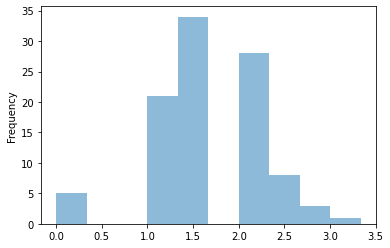

In [599]:
q2_cg['risk_perception'] = (q2_cg[['RW03_01',
                                                                'RW03_02',
                                                                'RW03_03']].sum(axis=1))/3
q2_cg['risk_perception'].plot.hist(bins=10, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

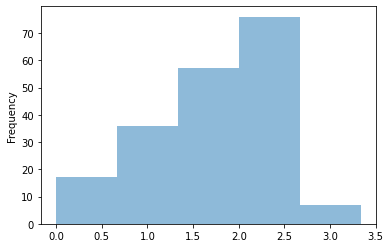

In [600]:
q2_eg['risk_perception'] = (q2_eg[['RW03_01',
                                                                'RW03_02',
                                                                'RW03_03']].sum(axis=1))/3
q2_eg['risk_perception'].plot.hist(bins=5, alpha=0.5)

In [601]:
# replace in q2
# gering > low
# eher > rather
# hoch > high
for column in q2_eg[q2_eg.columns.intersection(risk_perception)].columns:
    q2_eg[column] = q2_eg[column].map({1: "gering", 2: "eher gering", 3: "eher hoch", 4: "hoch", 0: "Keine Angabe"})

In [602]:
# replace in q2
for column in q2_cg[q2_cg.columns.intersection(risk_perception)].columns:
    q2_cg[column] = q2_cg[column].map({1: "gering", 2: "eher gering", 3: "eher hoch", 4: "hoch", 0: "Keine Angabe"})

### Efficacy related items

In [603]:
# list of efficacy / unefficacy items
effic_uneffic = ['HM07_01',
'HM07_02',
'HM07_03',
'HM07_04',
'HM07_05',
'HM07_06',]

In [604]:
# replace in q1
# keine Wirksamkeit > no efficacy
# eher geringe Wirksamkeit > rather low efficacy
# eher hohe Wirksamkeit > rather high efficacy
# hohe Wirksamkeit > high efficacy
for column in q1_eg[q1_eg.columns.intersection(effic_uneffic)].columns:
    q1_eg[column] = q1_eg[column].map({"1": "keine Wirksamkeit", "2": "eher geringe Wirksamkeit", "3": "eher hohe Wirksamkeit", "4": "hohe Wirksamkeit",  "-9": "nicht beantwortet", "-1": "Keine Angabe"})

In [605]:
# replace in q1
for column in q1_cg[q1_cg.columns.intersection(effic_uneffic)].columns:
    q1_cg[column] = q1_cg[column].map({"1": "keine Wirksamkeit", "2": "eher geringe Wirksamkeit", "3": "eher hohe Wirksamkeit", "4": "hohe Wirksamkeit",  "-9": "nicht beantwortet", "-1": "Keine Angabe"})

### No / Yes items

In [606]:
# list of no / yes items
no_yes_rather = ['RW01_01',
'H102_01',
'H102_02',
'H102_03',
'H102_04',
'H102_05',
'H102_06',
'H102_07',
'H104_01',
'H104_02',
'H104_03',
'VR04_01',
'VR04_02',
'VR04_03',
'VR04_04',
'VR04_05',
'VR04_06']

## Behavioral intention items

In [607]:
behavioral_intention = ['H201_01',
'H201_02',
'H202_01',
'H202_02',
'H202_03']

In [608]:
# replace in q2
for column in q2_cg[q2_cg.columns.intersection(behavioral_intention)].columns:
    q2_cg[column] = q2_cg[column].map({"1": 1, "2": 2, "3": 3, "4": 4,  "-9": 0, "-1": 0})

In [609]:
# replace in q2
for column in q2_eg[q2_eg.columns.intersection(behavioral_intention)].columns:
    q2_eg[column] = q2_eg[column].map({"1": 1, "2": 2, "3": 3, "4": 4,  "-9": 0, "-1": 0})

#### Calculate and plot the risk behavioral intention score

<AxesSubplot:ylabel='Frequency'>

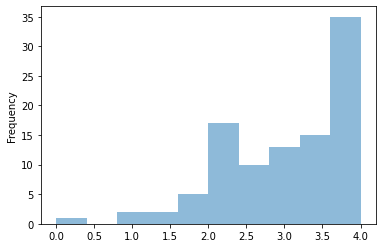

In [610]:
q2_cg['behavioral_intention'] = (q2_cg[['H201_01',
'H201_02',
'H202_01',
'H202_02',
'H202_03']].sum(axis=1))/5
q2_cg['behavioral_intention'].plot.hist(bins=10, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

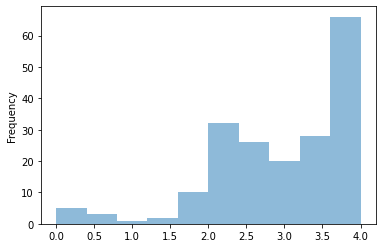

In [611]:
q2_eg['behavioral_intention'] = (q2_eg[['H201_01',
'H201_02',
'H202_01',
'H202_02',
'H202_03']].sum(axis=1))/5
q2_eg['behavioral_intention'].plot.hist(bins=10, alpha=0.5)

In [612]:
# replace in q2
for column in q2_eg[q2_eg.columns.intersection(behavioral_intention)].columns:
    q2_eg[column] = q2_eg[column].map({1: "nein", 2: "eher nein", 3: "eher ja", 4: "ja",  0: "Keine Angabe"})

In [613]:
# replace in q2
for column in q2_cg[q2_cg.columns.intersection(behavioral_intention)].columns:
    q2_cg[column] = q2_cg[column].map({1: "nein", 2: "eher nein", 3: "eher ja", 4: "ja",  0: "Keine Angabe"})

In [614]:
# replace in q2
for column in q2_eg[q2_eg.columns.intersection(no_yes_rather)].columns:
    q2_eg[column] = q2_eg[column].map({"1": "nein", "2": "eher nein", "3": "eher ja", "4": "ja",  "-9": "nicht beantwortet", "-1": "Keine Angabe"})

In [615]:
# replace in q2
for column in q1_eg[q1_eg.columns.intersection(no_yes_rather)].columns:
    q1_eg[column] = q1_eg[column].map({"1": "nein", "2": "eher nein", "3": "eher ja", "4": "ja",  "-9": "nicht beantwortet", "-1": "Keine Angabe"})

In [616]:
# replace in q2
for column in q2_cg[q2_cg.columns.intersection(no_yes_rather)].columns:
    q2_cg[column] = q2_cg[column].map({"1": "nein", "2": "eher nein", "3": "eher ja", "4": "ja",  "-9": "nicht beantwortet", "-1": "Keine Angabe"})

In [617]:
# replace in q2
for column in q1_cg[q1_cg.columns.intersection(no_yes_rather)].columns:
    q1_cg[column] = q1_cg[column].map({"1": "nein", "2": "eher nein", "3": "eher ja", "4": "ja",  "-9": "nicht beantwortet", "-1": "Keine Angabe"})

### No / Yes 5 point likert scale items

### Information comprehension score

In [618]:
# list of nein, eher nein, mittelmäßig, eher ja, ja items in the q2
no_yes_5_scale = ['IS01_01',
'IS01_02',
'IS01_03',
'IS01_04',
'IS01_05',
'IS01_07',
'IS01_08',
'IS01_09',
'IS01_10']

In [619]:
# replace in q2
for column in q2_cg[q2_cg.columns.intersection(no_yes_5_scale)].columns:
    q2_cg[column] = q2_cg[column].map({"1": 1, "2": 2, "3": 3, "4": 4, "5": 5,  "-9": 0, "-1": 0})

In [620]:
# replace in q2
for column in q2_eg[q2_eg.columns.intersection(no_yes_5_scale)].columns:
    q2_eg[column] = q2_eg[column].map({"1": 1, "2": 2, "3": 3, "4": 4, "5": 5,  "-9": 0, "-1": 0})

In [621]:
# replace extra for the only negative question
q2_eg["IS01_06"] = q2_eg["IS01_06"].map({"1": 5, "2": 4, "3": 3, "4": 2, "5": 1,  "-9": 0, "-1": 0})

In [622]:
# replace extra for the only negative question
q2_cg["IS01_06"] = q2_cg["IS01_06"].map({"1": 5, "2": 4, "3": 3, "4": 2, "5": 1,  "-9": 0, "-1": 0})

#### Calculate and plot the information comprehension score

<AxesSubplot:ylabel='Frequency'>

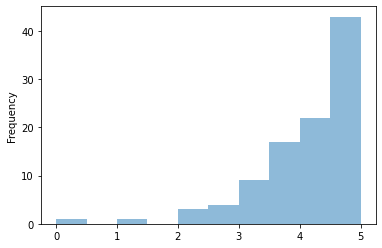

In [623]:
q2_cg['information_comprehension_subjective_score'] = (q2_cg[['IS01_01',
'IS01_02',
'IS01_03',
'IS01_04',
'IS01_05',
'IS01_06',
'IS01_07',
'IS01_08',
'IS01_09',
'IS01_10']].sum(axis=1))/10
q2_cg['information_comprehension_subjective_score'].plot.hist(bins=10, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

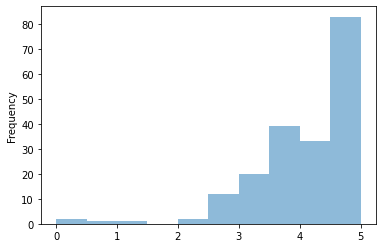

In [624]:
q2_eg['information_comprehension_subjective_score'] = (q2_eg[['IS01_01',
'IS01_02',
'IS01_03',
'IS01_04',
'IS01_05',
'IS01_06',
'IS01_07',
'IS01_08',
'IS01_09',
'IS01_10']].sum(axis=1))/10
q2_eg['information_comprehension_subjective_score'].plot.hist(bins=10, alpha=0.5)

In [625]:
# replace in q2
# nein > no
# eher nein > rather no
# mittelmäßig > averagely
# eher ja > rather yes
# ja > yes
for column in q2_eg[q2_eg.columns.intersection(no_yes_5_scale)].columns:
    q2_eg[column] = q2_eg[column].map({1: "nein", 2: "eher nein", 3: "mittelmäßig", 4: "eher ja", 5: "ja",  0: "Keine Angabe"})

In [626]:
# replace in q2
for column in q2_cg[q2_cg.columns.intersection(no_yes_5_scale)].columns:
    q2_cg[column] = q2_cg[column].map({1: "nein", 2: "eher nein", 3: "mittelmäßig", 4: "eher ja", 5: "ja",  0: "Keine Angabe"})

In [627]:
# replace extra for the only negative question
q2_eg["IS01_06"] = q2_eg["IS01_06"].map({1: "nein", 2: "eher nein", 3: "mittelmäßig", 4: "eher ja", 5: "ja",  0: "Keine Angabe"})

In [628]:
# replace extra for the only negative question
q2_cg["IS01_06"] = q2_cg["IS01_06"].map({1: "nein", 2: "eher nein", 3: "mittelmäßig", 4: "eher ja", 5: "ja",  0: "Keine Angabe"})

### high / low items

In [629]:
# list of high / low items in q2
high_low = ['RW02_01',
'RW05_01',
'RW05_02',
'RW05_03',
'VR05_01',
'VR05_02',
'VR05_03']

In [630]:
# replace in q2
for column in q2_eg[q2_eg.columns.intersection(high_low)].columns:
    q2_eg[column] = q2_eg[column].map({"1": "gering", "2": "eher gering", "3": "eher hoch", "4": "hoch",  "-9": "nicht beantwortet", "-1": "Keine Angabe"})

In [631]:
# replace in q2
for column in q1_cg[q1_cg.columns.intersection(high_low)].columns:
    q1_cg[column] = q1_cg[column].map({"1": "gering", "2": "eher gering", "3": "eher hoch", "4": "hoch",  "-9": "nicht beantwortet", "-1": "Keine Angabe"})

In [632]:
# replace in q2
for column in q1_eg[q1_eg.columns.intersection(high_low)].columns:
    q1_eg[column] = q1_eg[column].map({"1": "gering", "2": "eher gering", "3": "eher hoch", "4": "hoch",  "-9": "nicht beantwortet", "-1": "Keine Angabe"})

In [633]:
# replace in q2
for column in q2_cg[q2_cg.columns.intersection(high_low)].columns:
    q2_cg[column] = q2_cg[column].map({"1": "gering", "2": "eher gering", "3": "eher hoch", "4": "hoch",  "-9": "nicht beantwortet", "-1": "Keine Angabe"})

### Quiz items

In [634]:
# list of quiz items in the q2
quiz1_right = ['IO03',
    'IO04']

In [635]:
# list of quiz items in the q2
quiz2_right = ['IO01',
    'IO02',
    'IO05',
    'IO06']

In [636]:
quiz1_eg = q2_eg[quiz1_right]
quiz2_eg = q2_eg[quiz2_right]
quiz1_cg = q2_eg[quiz1_right]
quiz2_cg = q2_eg[quiz2_right]

In [637]:
# replace 
for column in q2_eg[q2_eg.columns.intersection(quiz1_right)].columns:
    q2_eg[column] = q2_eg[column].map({"1": 1, "2": 0,  "-9": 0, "-1": 0})

In [638]:
# replace 
for column in q2_cg[q2_cg.columns.intersection(quiz1_right)].columns:
    q2_cg[column] = q2_cg[column].map({"1": 1, "2": 0,  "-9": 0, "-1": 0})

In [639]:
# replace 
for column in q2_eg[q2_eg.columns.intersection(quiz2_right)].columns:
    q2_eg[column] = q2_eg[column].map({"1": 0, "2": 1,  "-9": 0, "-1": 0})

In [640]:
# replace 
for column in q2_cg[q2_cg.columns.intersection(quiz2_right)].columns:
    q2_cg[column] = q2_cg[column].map({"1": 0, "2": 1,  "-9": 0, "-1": 0})

### Score of Quiz items

In [641]:
q2_eg['quiz_score'] = q2_eg[['IO01', 'IO02', 'IO03', 'IO05', 'IO04', 'IO06']].sum(axis=1)/6
q2_eg['quiz_score']

2      1.000000
3      1.000000
4      0.000000
5      1.000000
6      0.666667
         ...   
202    1.000000
203    1.000000
204    0.000000
205    0.666667
206    0.833333
Name: quiz_score, Length: 193, dtype: float64

In [642]:
q2_cg['quiz_score'] = q2_cg[['IO01', 'IO02', 'IO03', 'IO05', 'IO04', 'IO06']].sum(axis=1)/6
q2_cg['quiz_score']

1      0.666667
2      0.833333
3      1.000000
4      0.833333
5      0.166667
         ...   
104    0.833333
106    1.000000
107    0.500000
109    0.833333
110    0.833333
Name: quiz_score, Length: 100, dtype: float64

# Replace with friendly labels

In [643]:
# replace 
for column in quiz1_eg[quiz1_eg.columns.intersection(quiz1_right)].columns:
    quiz1_eg[column] = quiz1_eg[column].map({"1": "Option A", "2": "Option B",  "-9": "nan", "-1": "ich weiss es nicht"})

In [644]:
# replace 
for column in quiz1_cg[quiz1_cg.columns.intersection(quiz1_right)].columns:
    quiz1_cg[column] = quiz1_cg[column].map({"1": "Option A", "2": "Option B",  "-9": "nan", "-1": "ich weiss es nicht"})

In [645]:
# replace 
for column in quiz2_eg[quiz2_eg.columns.intersection(quiz2_right)].columns:
    quiz2_eg[column] = quiz2_eg[column].map({"1": "Option A", "2": "Option B",  "-9": "nan", "-1": "ich weiss es nicht"})

In [646]:
# replace 
for column in quiz2_cg[quiz2_cg.columns.intersection(quiz2_right)].columns:
    quiz2_cg[column] = quiz2_cg[column].map({"1": "Option A", "2": "Option B",  "-9": "nan", "-1": "ich weiss es nicht"})

In [647]:
q2_cg[quiz1_right] = quiz1_cg[quiz1_right]
q2_eg[quiz1_right] = quiz1_eg[quiz1_right]
q2_cg[quiz2_right] = quiz2_cg[quiz2_right]
q2_eg[quiz2_right] = quiz2_eg[quiz2_right]

### Rejoin dataframes

In [648]:
control_group_df = pd.concat([q1_cg.reset_index(drop=True), q2_cg.reset_index(drop=True), interactions_wps_cg.reset_index(drop=True)], axis=1)
control_group_df.head()

,SD01,SD02_01,SD03_01,SD04,SD05_01,SD06,SD07,HI01,HI02,HI03,HI04,HI05,HI06,VR01,VR02,VR03,VR03_01,VR03_02,VR03_03,VR03_04,VR03_05,VR04_01,VR04_02,VR04_03,VR04_04,VR04_05,VR04_06,VR05_01,VR05_02,VR05_03,VR06,HM01,HM02_01,HM03,HM04_01,HM05,HM06,HM07_01,HM07_02,HM07_03,HM07_04,HM07_05,HM07_06,K001,IS01_01,IS01_02,IS01_03,IS01_04,IS01_05,IS01_06,IS01_07,IS01_08,IS01_09,IS01_10,IS02_01,IS03_01,IO01,IO02,IO03,IO04,IO05,IO06,RW01_01,RW02_01,RW03_01,RW03_02,RW03_03,RW04_01,RW04_02,RW04_03,RW05_01,RW05_02,RW05_03,H101,H102_01,H102_02,H102_03,H102_04,H102_05,H102_06,H102_07,H103,H104_01,H104_02,H104_03,H105_01,H106_01,H201_01,H201_02,H202_01,H202_02,H202_03,CL01_01,CL01_02,CL01_03,CL01_04,CL01_05,CL01_06,CA01_01,CA01_02,CA01_03,CA01_04,CA01_05,CA01_06,CS01_01,CS01_02,CS01_03,CS01_04,CS01_05,CS01_06,US01_01,US01_02,US01_03,US01_04,uncertainty_score,coping_score,risk_perception,behavioral_intention,information_comprehension_subjective_score,quiz_score,M501_01,M501_02,M501_03,M501_04,M501_05,M501_06,M502_01,M502_02,M502_03
0,Männlich,1968,09116,Ausbildung,1,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,0 bis 5 Jahres,länger als 10 Jahre,2. Etage oder höher,Ja,Edelgas,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,Keine Angabe,eher ja,eher ja,Keine Angabe,Keine Angabe,Keine Angabe,gering,gering,gering,Ja,Nein,NaN,Nein,NaN,Nein,Nein,keine Wirksamkeit,keine Wirksamkeit,Keine Angabe,keine Wirksamkeit,keine Wirksamkeit,keine Wirksamkeit,Radon-Gebiet,eher ja,eher ja,mittelmäßig,mittelmäßig,mittelmäßig,eher ja,mittelmäßig,mittelmäßig,mittelmäßig,mittelmäßig,sehr übersichtlich,habe das gefühl das dies ein weiterer versuch ...,NaN,NaN,NaN,NaN,NaN,NaN,nein,eher gering,eher gering,eher gering,eher gering,3,4,3,eher gering,eher gering,eher gering,Nein,Keine Angabe,nein,Keine Angabe,Keine Angabe,ja,nein,ja,Keine Angabe,NaN,NaN,NaN,NaN,NaN,ja,eher nein,eher ja,eher ja,Keine Angabe,stimme nicht zu,stimme zu,Keine Angabe,stimme zu,stimme nicht zu,stimme eher zu,stimme nicht zu,stimme zu,stimme eher zu,stimme eher zu,stimme nicht zu,Keine Angabe,stimme zu,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,stimme nicht zu,Keine Angabe,Keine Angabe,Keine Angabe,0.25,2.055556,2.000000,2.4,3.3,0.666667,clicked,clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked
1,Weiblich,1961,01108,Hochschulabschluß,2,Nein,Ja,Eigentumer*innen,Nein,in einem Ein- oder Zweifamilienhaus,länger als 10 Jahre,länger als 10 Jahre,1. Etage,Ja,Edelgas,1,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ja,nein,eher ja,ja,ja,nein,eher hoch,eher hoch,eher hoch,Ja,Nein,NaN,Nein,NaN,Nein,Nein,hohe Wirksamkeit,keine Wirksamkeit,hohe Wirksamkeit,Keine Angabe,eher hohe Wirksamkeit,hohe Wirksamkeit,Angrenzend zu Radon-Gebieten,ja,ja,ja,ja,ja,nein,ja,ja,ja,ja,Sachlich und informativ,nichts,Option B,Option B,Option A,Option A,Option B,Option B,ja,hoch,eher gering,eher gering,gering,4,4,4,eher hoch,eher gering,eher gering,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,ja,ja,ja,ja,ja,stimme nicht zu,stimme zu,stimme eher nicht zu,stimme zu,stimme nicht zu,stimme zu,stimme nicht zu,stimme zu,stimme nicht zu,stimme zu,stimme nicht zu,stimme zu,stimme eher zu,stimme zu,stimme eher nicht zu,stimme zu,stimme nicht zu,stimme eher zu,stimme eher nicht zu,stimme nicht zu,stimme nicht zu,stimme eher nicht zu,1.50,3.722222,1.666667,4.0,4.6,0.833333,clicked,clicked,clicked,not_clicked,clicked,clicked,not_clicked,not_clicked,not_clicked
2,Männlich,1965,83278,Ausbildung,1,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,6 bis 10 Jahre,6 bis 10 Jahre,1. Etage,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten,ja,ja,eher ja,eher ja,ja,eher ja,mittelmäßig,eher ja,eher ja,eher ja,übersichtlich,viel Text,Option B,Option B,Option A,Option A,Option 

In [649]:
experimental_group_df = pd.concat([q1_eg.reset_index(drop=True), q2_eg.reset_index(drop=True), interactions_wps_eg.reset_index(drop=True)], axis=1)
experimental_group_df.head()

,SD01,SD02_01,SD03_01,SD04,SD05_01,SD06,SD07,HI01,HI02,HI03,HI04,HI05,HI06,VR01,VR02,VR03,VR03_01,VR03_02,VR03_03,VR03_04,VR03_05,VR04_01,VR04_02,VR04_03,VR04_04,VR04_05,VR04_06,VR05_01,VR05_02,VR05_03,VR06,HM01,HM02_01,HM03,HM04_01,HM05,HM06,HM07_01,HM07_02,HM07_03,HM07_04,HM07_05,HM07_06,RG01,RG02,IS01_01,IS01_02,IS01_03,IS01_04,IS01_05,IS01_06,IS01_07,IS01_08,IS01_09,IS01_10,IS02_01,IS03_01,IO01,IO02,IO03,IO04,IO05,IO06,RW01_01,RW02_01,RW03_01,RW03_02,RW03_03,RW04_01,RW04_02,RW04_03,RW05_01,RW05_02,RW05_03,H101,H102_01,H102_02,H102_03,H102_04,H102_05,H102_06,H102_07,H103,H104_01,H104_02,H104_03,H105_01,H106_01,H201_01,H201_02,H202_01,H202_02,H202_03,CL01_01,CL01_02,CL01_03,CL01_04,CL01_05,CL01_06,CA01_01,CA01_02,CA01_03,CA01_04,CA01_05,CA01_06,CS01_01,CS01_02,CS01_03,CS01_04,CS01_05,CS01_06,US01_01,US01_02,US01_03,US01_04,uncertainty_score,coping_score,risk_perception,behavioral_intention,information_comprehension_subjective_score,quiz_score,M101_01,M101_02,M101_03,M101_04,M101_05,M101_06,M101_07,M101_08,M101_09,M101_10,M101_11,M101_12,M101_13,M101_14,M101_15,M101_16,M201_01,M201_02,M201_03,M201_04,M201_05,M201_06,M201_07,M201_08,M201_09,M201_10,M201_11,M201_12,M201_13,M201_14,M201_15,M201_16,M401_01,M401_02,M401_03,M401_04,M401_05,M401_06,M401_07,M401_08,M401_09,M401_10,M401_11,M401_12,M401_13,M401_14,M401_15,M401_16,M301_01,M301_02,M301_03,M301_04,M301_05,M301_06,M301_07,M301_08,M301_09,M301_10,M301_11,M301_12,M301_13,M301_14,M301_15,M301_16
0,Männlich,1960,08228,Hochschulabschluß,2,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,0 bis 5 Jahres,länger als 10 Jahre,Erdgeschoß,Ja,Edelgas,1,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,Nicht ausgewählt,ausgewählt,eher ja,eher nein,eher ja,eher nein,eher ja,nein,eher gering,eher gering,eher gering,Ja,Nein,NaN,Nein,NaN,Nein,Nein,eher hohe Wirksamkeit,eher geringe Wirksamkeit,eher geringe Wirksamkeit,eher geringe Wirksamkeit,eher hohe Wirksamkeit,eher hohe Wirksamkeit,NaN,Angrenzend zu Radon-Gebieten,mittelmäßig,eher ja,eher nein,eher nein,eher nein,nein,mittelmäßig,mittelmäßig,mittelmäßig,eher nein,NaN,NaN,Option B,Option B,Option A,Option A,Option B,Option B,eher nein,eher gering,eher gering,eher gering,gering,3,3,2,eher gering,eher hoch,eher gering,Nein,nein,nein,ja,ja,ja,nein,eher ja,Keine Angabe,NaN,NaN,NaN,NaN,NaN,eher ja,eher ja,eher ja,eher ja,eher nein,stimme eher zu,stimme eher nicht zu,stimme eher nicht zu,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher nicht zu,stimme eher nicht zu,stimme eher nicht zu,stimme eher zu,stimme eher zu,stimme eher zu,stimme eher nicht zu,stimme eher nicht zu,2.50,2.666667,1.666667,2.8,2.5,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Männlich,1958,09113,Ausbildung,2,Nein,Nein,Mieter*innen,Nein,in einem Mehrfamilienhaus oder einer Wohnung,länger als 10 Jahre,länger als 10 Jahre,2. Etage oder höher,Nein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angrenzend zu Radon-Gebieten,eher ja,eher ja,mittelmäßig,eher ja,eher ja,mittelmäßig,mittelmäßig,eher ja,eher ja,eher ja,man sollte messen,nichts,Option B,Option B,Option A,Option A,Option B,Option B,NaN,eher hoch,eher gering,eher gering,eher gering,3,3,3,eher hoch,eher hoch,eher hoch,Nein,eher ja,Keine Angabe,eher ja,eher nein,eher ja,Keine Angabe,Keine Angabe,Keine Angabe,NaN,NaN,NaN,NaN,NaN,ja,eher ja,ja,eher ja,eher ja,stimme eher nicht zu,stimme eher zu,stimme eher nicht zu,stimme eher zu,stimme eher nicht z

### Define 4 groups based on the experiment factors

In [656]:
# combine location and living condition for creating the subgroup
experimental_group_df["target_group"] = experimental_group_df["RG01"].astype(str) + "_" + experimental_group_df["RG02"].astype(str) + "-" + experimental_group_df["HI01"].astype(str) 
experimental_group_df["target_group"].head()

0        nan_Angrenzend zu Radon-Gebieten-Mieter*innen
1        nan_Angrenzend zu Radon-Gebieten-Mieter*innen
2                        nan_Radon-Gebiet-Mieter*innen
3    Angrenzend zu Radon-Gebieten_nan-Eigentumer*innen
4    Angrenzend zu Radon-Gebieten_nan-Eigentumer*innen
Name: target_group, dtype: object

In [659]:
# combine location and living condition for creating the subgroup
control_group_df["target_group"] = control_group_df["K001"].astype(str) + "-" + control_group_df["HI01"].astype(str) 
control_group_df["target_group"].head()

0                        Radon-Gebiet-Mieter*innen
1    Angrenzend zu Radon-Gebieten-Eigentumer*innen
2        Angrenzend zu Radon-Gebieten-Mieter*innen
3    Angrenzend zu Radon-Gebieten-Eigentumer*innen
4                        Radon-Gebiet-Mieter*innen
Name: target_group, dtype: object

In [660]:
# remove nan in the eg due to the fact that there were two questions for location. One for tenants and one for landlords
experimental_group_df["target_group"] = experimental_group_df["target_group"].str.replace("nan_", "")
experimental_group_df["target_group"] = experimental_group_df["target_group"].str.replace("_nan", "")
# experimental_group_df["target_group"] = experimental_group_df["target_group"].str.replace("Ich wohne in einem Radon-Gebiet bzw. durchschnittlich zeigen die Messungen vor Ort Werte über dem Referenzwert von 100 kBq/m3 an.", "Radon-Gebiet")
# experimental_group_df["target_group"] = experimental_group_df["target_group"].str.replace("Ich wohne angrenzend zu einem Radon-Gebiet bzw. durchschnittlich zeigen die Messungen vor Ort Werte unter dem Referenzwert von 100 kBq/m3 an.", "Angrenzend zu einem Radon-Gebieten")
# experimental_group_df["target_group"] = experimental_group_df["target_group"].str.replace("Ich wohne zur Miete.", "Mieter*innen")
# experimental_group_df["target_group"] = experimental_group_df["target_group"].str.replace("Ich wohne im eigenen Haus bzw. in der eigenen Wohnung.", "Eigentum*innen")
experimental_group_df["target_group"].head()

0        Angrenzend zu Radon-Gebieten-Mieter*innen
1        Angrenzend zu Radon-Gebieten-Mieter*innen
2                        Radon-Gebiet-Mieter*innen
3    Angrenzend zu Radon-Gebieten-Eigentumer*innen
4    Angrenzend zu Radon-Gebieten-Eigentumer*innen
Name: target_group, dtype: object

In [661]:
# check the result
experimental_group_df["target_group"].unique()

array(['Angrenzend zu Radon-Gebieten-Mieter*innen',
       'Radon-Gebiet-Mieter*innen',
       'Angrenzend zu Radon-Gebieten-Eigentumer*innen',
       'Radon-Gebiet-Eigentumer*innen'], dtype=object)

In [662]:
control_group_df["target_group"] = control_group_df["target_group"].str.replace("nan_", "")
control_group_df["target_group"] = control_group_df["target_group"].str.replace("_nan", "")
# control_group_df["target_group"] = control_group_df["target_group"].str.replace("Ich wohne in einem Radon-Gebiet bzw. durchschnittlich zeigen die Messungen vor Ort Werte über dem Referenzwert von 100 kBq/m3 an.", "Radon-Gebiet")
# control_group_df["target_group"] = control_group_df["target_group"].str.replace("Ich wohne angrenzend zu einem Radon-Gebiet bzw. durchschnittlich zeigen die Messungen vor Ort Werte unter dem Referenzwert von 100 kBq/m3 an.", "Angrenzend zu einem Radon-Gebieten")
# control_group_df["target_group"] = control_group_df["target_group"].str.replace("Ich wohne zur Miete.", "Mieter*innen")
# control_group_df["target_group"] = control_group_df["target_group"].str.replace("Ich wohne im eigenen Haus bzw. in der eigenen Wohnung.", "Eigentum*innen")
control_group_df["target_group"].head()

0                        Radon-Gebiet-Mieter*innen
1    Angrenzend zu Radon-Gebieten-Eigentumer*innen
2        Angrenzend zu Radon-Gebieten-Mieter*innen
3    Angrenzend zu Radon-Gebieten-Eigentumer*innen
4                        Radon-Gebiet-Mieter*innen
Name: target_group, dtype: object

In [663]:
control_group_df["target_group"].unique()

array(['Radon-Gebiet-Mieter*innen',
       'Angrenzend zu Radon-Gebieten-Eigentumer*innen',
       'Angrenzend zu Radon-Gebieten-Mieter*innen',
       'Radon-Gebiet-Eigentumer*innen'], dtype=object)

### Save dataframes

In [392]:
today = datetime.datetime.today().strftime('%d-%m-%Y')

In [393]:
experimental_group_df.to_csv(f'{today}_experimental_group_df.csv')

In [394]:
control_group_df.to_csv(f'{today}_control_group_df.csv')

In [664]:
len(control_group_df), len(experimental_group_df)

(100, 193)